# **Microcredit customer classification using machine learning prediction  techniques: A guide to the selection of the technique to be used in model building**

**Authors:** Emmanuel Gutiérrez Jiménez, Wendy Paola Paez Beltrán, José Mario Baldovino Díaz

# **1. Inicialización**

## **1.1. Cargar las librerías: panda, numpy, matplotlib, seaborn**

In [ ]:
# Cargar las librerías necesarias para la ejecución del código fuente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex
from IPython.display import Math
from google.colab import files
from sklearn.metrics import confusion_matrix

## **1.2.	Cargar el dataset**


In [ ]:
# Cargar el archivo del dataset al entorno de ejecución
uploaded = files.upload()

Saving MicroloansDataSet3.xlsx to MicroloansDataSet3 (1).xlsx


In [ ]:
def construir_df():
  """
  Función que captura los datos en un Dataframe y lo divide en 2 (Uno para las características df_X y otro para las etiquetas df_y)
  Retorna: df   --> Retorna un dataframe con todos los datos
  """
  #Cargar los datos del excel al Dataframe
  #df = pd.read_excel('MicroloansDataSet.xlsx')
  df = pd.read_excel('MicroloansDataSet3.xlsx')

  return df

df = construir_df()

In [ ]:
# Mostrar los resultados del Dataframe en salida LATEX y visual
display(Latex("$Tamaño del dataframe:".replace(" "," \\ ") +str(df.shape)+"$"))
display(Latex("$ \\ $"))

df.head(10)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,cod_neg,periodo_desembolso,anio_desembolso,mes_desembolso,tipo_credito,max_altura_mora,mora_promedio,nivel_riesgo,cuotas_pagadas,credito_activo,...,oblig_mora_hist_m_90_tc_rot,oblig_mora_hist_m_90_banc_sin_mc,oblig_mora_hist_m_90_mc,oblig_mora_hist_m_90_real,oblig_mora_hist_m_90_telco,al_dia_combinada,reincidencia_mora_banc_sin_mc,reincidencia_mora_mc,reincidencia_mora_real,reincidencia_mora_telco
0,MC0045556,202002,2020,2,Microcredito 1,01- CORRIENTE,01- CORRIENTE,Pre Aprobado - Riesgo Medio,15,NO,...,NaN,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
1,MC0045565,202002,2020,2,Microcredito 2,14- MAYOR A 1 ANIO,11- ENTRE 271 Y 300,Zona Gris,18,NO,...,NaN,NaN,0.0,NaN,NaN,0,NO,NO,NO,NO
2,MC0045711,202002,2020,2,Microcredito 1,01- CORRIENTE,01- CORRIENTE,Pre Aprobado - Riesgo Alto,12,NO,...,NaN,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
3,MC18170,201902,2019,2,Microcredito 1,02- 1 A 30,02- 1 A 30,Pre Aprobado - Riesgo Alto,10,NO,...,NaN,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
4,MC18277,201902,2019,2,Microcredito 1,03- ENTRE 31 Y 60,02- 1 A 30,Zona Gris,6,NO,...,NaN,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
5,MC18558,201903,2019,3,Microcredito 2,14- MAYOR A 1 ANIO,14- MAYOR A 1 ANIO,Pre Aprobado - Riesgo Alto,11,SI,...,NaN,NaN,0.0,NaN,NaN,0,NO,NO,NO,NO
6,MC18615,201903,2019,3,Microcredito 1,01- CORRIENTE,01- CORRIENTE,Zona Gris,12,NO,...,NaN,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
7,MC19125,201904,2019,4,Microcredito 1,14- MAYOR A 1 ANIO,14- MAYOR A 1 ANIO,Pre Aprobado - Riesgo Medio,0,SI,...,NaN,NaN,0.0,NaN,NaN,0,NO,NO,NO,NO
8,MC19423,201904,2019,4,Microcredito 1,01- CORRIENTE,01- CORRIENTE,Pre Aprobado - Riesgo Alto,17,NO,...,0.0,NaN,NaN,NaN,NaN,0,NO,NO,NO,NO
9,MC19450,201904,2019,4,Microcredito 2,14- MAYOR A 1 ANIO,14- MAYOR A 1 ANIO,Pre Aprobado - Riesgo Medio,9,SI,...,NaN,NaN,0.0,NaN,NaN,0,NO,NO,NO,NO


In [ ]:
# Crear la variable y del Dataset a partir de la edad de mora de los clientes
#df["tipo_cliente"] = df["max_altura_mora"].apply(lambda x: "BUENO" if (x == "01- CORRIENTE") | (x == "02- 1 A 30") else "MALO")
df['tipo_cliente'] = np.where((df["max_altura_mora"]=="01- CORRIENTE")|(df["max_altura_mora"]=="02- 1 A 30")|((df["max_altura_mora"]=="03- ENTRE 31 Y 60")&(df["mora_promedio"]=="02- 1 A 30"))|((df["max_altura_mora"]=="04- ENTRE 61 Y 90")&(df["mora_promedio"]=="02- 1 A 30")), 'BUENO', 'MALO')

## **1.3. Exploración de datos**

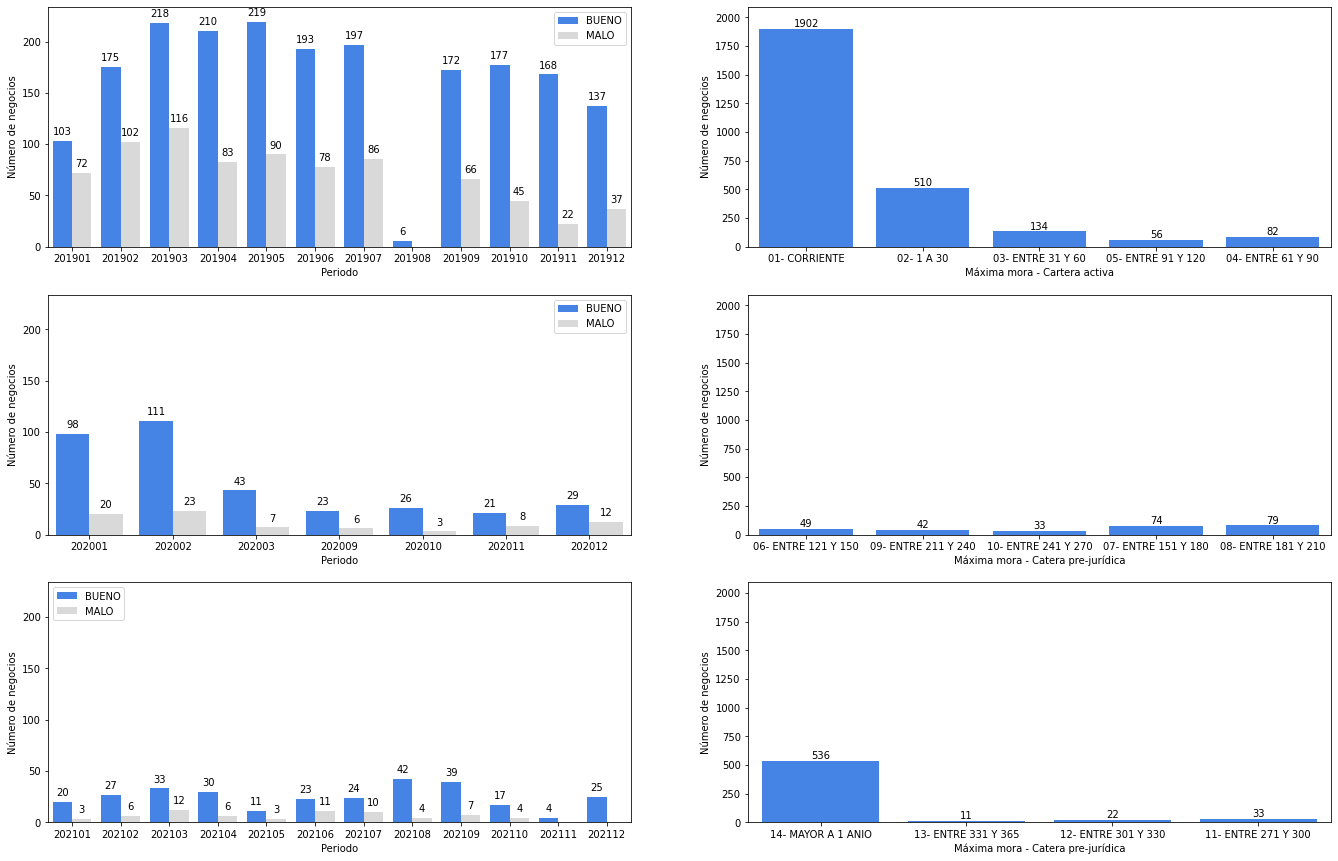

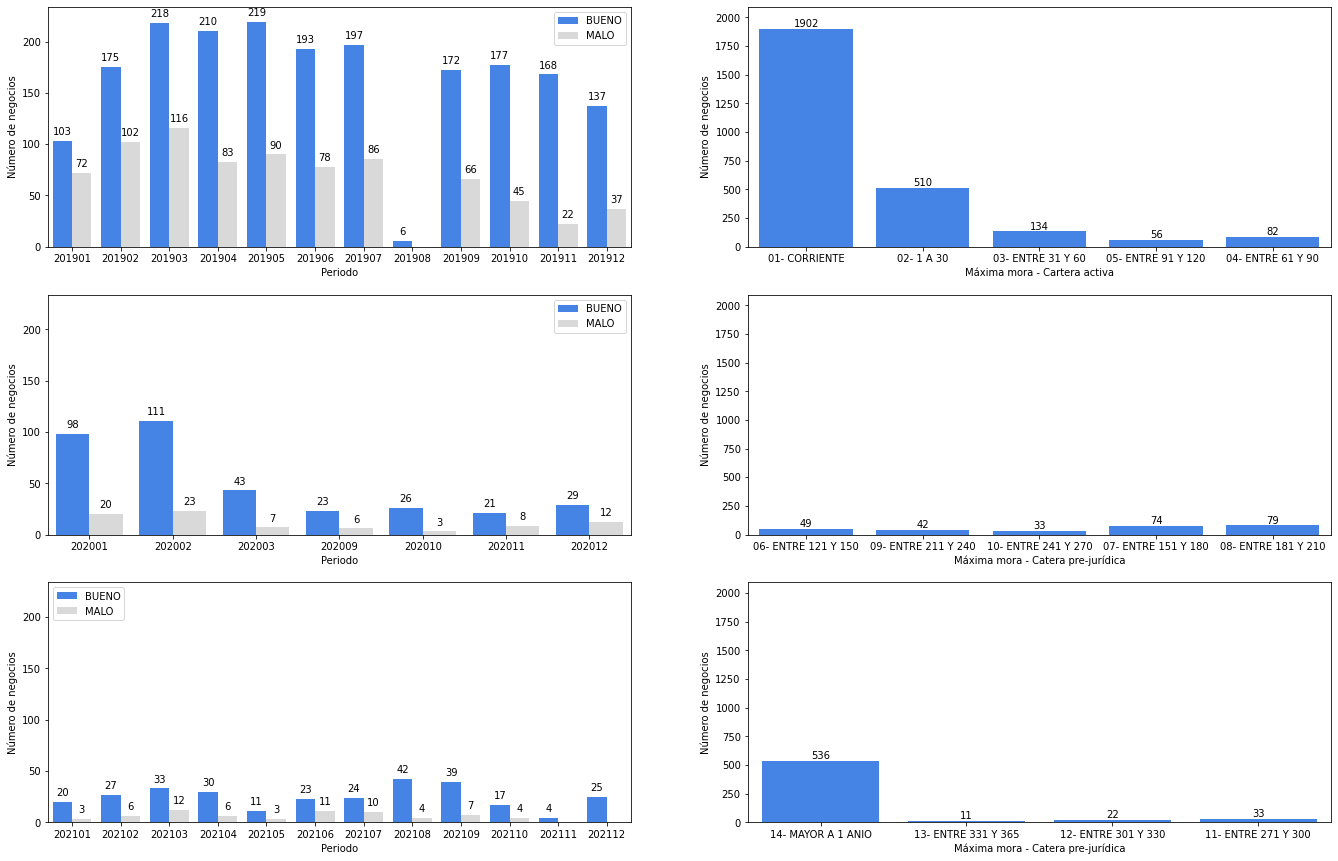

In [ ]:
sns.set_palette("Set1")

def mostrar_valores_barras(g, espacio_adc):
  for i in g.patches:
    if not np.isnan(i.get_height()):
      g.annotate(int(i.get_height())
                , (i.get_x() + i.get_width() / 2, i.get_height()+espacio_adc)
                , ha="center"
                , va="baseline"
                , fontsize="10"
                , color="black"
                , xytext = (0,1)
                , textcoords="offset points")

def graficar_negocios(df):
  """  
  Función que toma el Dataframe y crea el dataset de entrenamiento, dataset de prueba y luego los divide en 2 (Uno para las características df_X y otro para las etiquetas df_y) 
  Entrada: df   --> Dataframe con el que se van a realizar las gráficas
  Retorna: La gráfica Sns.countplot de los negocios
  """
  sns.color_palette()

  fig, axes = plt.subplots(3, 2, figsize=(23, 15), sharey=False)

  g_1 = sns.countplot(ax=axes[0,0], x='periodo_desembolso',hue="tipo_cliente", palette=["#2A7FFF", "#d9d9d9"], data=df[df["anio_desembolso"]==2019]);
  axes[0,0].set_xlabel("Periodo")
  axes[0,0].set_ylabel("Número de negocios")
  axes[0,0].set_ylim(0, df["periodo_desembolso"].value_counts().max()*0.7)
  mostrar_valores_barras(g_1, 5)
  axes[0,0].legend()
  
  g_1 = sns.countplot(ax=axes[1,0], x='periodo_desembolso',hue="tipo_cliente", palette=["#2A7FFF", "#d9d9d9"], data=df[df["anio_desembolso"]==2020]);
  axes[1,0].set_xlabel("Periodo")
  axes[1,0].set_ylabel("Número de negocios")
  axes[1,0].set_ylim(0, df["periodo_desembolso"].value_counts().max()*0.7)
  mostrar_valores_barras(g_1, 5)
  axes[1,0].legend()

  g_1 = sns.countplot(ax=axes[2,0], x='periodo_desembolso',hue="tipo_cliente", palette=["#2A7FFF", "#d9d9d9"], data=df[df["anio_desembolso"]==2021]);
  axes[2,0].set_xlabel("Periodo")
  axes[2,0].set_ylabel("Número de negocios")
  axes[2,0].set_ylim(0, df["periodo_desembolso"].value_counts().max()*0.7)
  mostrar_valores_barras(g_1, 5)
  axes[2,0].legend()

  g_2 = sns.countplot(ax=axes[0,1], x='max_altura_mora', palette=["#2A7FFF"], data=df[df.max_altura_mora.isin(["01- CORRIENTE","02- 1 A 30","03- ENTRE 31 Y 60","04- ENTRE 61 Y 90","05- ENTRE 91 Y 120"])]);
  axes[0,1].set_xlabel("Máxima mora - Cartera activa")
  axes[0,1].set_ylabel("Número de negocios")
  axes[0,1].set_ylim(0, df["max_altura_mora"].value_counts().max()*1.1)
  mostrar_valores_barras(g_2, 10)

  g_2 = sns.countplot(ax=axes[1,1], x='max_altura_mora', palette=["#2A7FFF"], data=df[df.max_altura_mora.isin(["06- ENTRE 121 Y 150","07- ENTRE 151 Y 180","08- ENTRE 181 Y 210","09- ENTRE 211 Y 240","10- ENTRE 241 Y 270"])]) 
  axes[1,1].set_xlabel("Máxima mora - Catera pre-jurídica")
  axes[1,1].set_ylabel("Número de negocios")
  axes[1,1].set_ylim(0, df["max_altura_mora"].value_counts().max()*1.1)
  mostrar_valores_barras(g_2, 10)

  g_2 = sns.countplot(ax=axes[2,1], x='max_altura_mora', palette=["#2A7FFF"], data=df[df.max_altura_mora.isin(["11- ENTRE 271 Y 300","12- ENTRE 301 Y 330","13- ENTRE 331 Y 365","14- MAYOR A 1 ANIO"])]) 
  axes[2,1].set_xlabel("Máxima mora - Catera pre-jurídica")
  axes[2,1].set_ylabel("Número de negocios")
  axes[2,1].set_ylim(0, df["max_altura_mora"].value_counts().max()*1.1)
  mostrar_valores_barras(g_2, 10)

graficar_negocios(df)


Vemos que en el Dataset existen préstamos de Microcrédito que se desembolsaron durante el periodo muy cercano o dentro de la pandemia, teniendo en cuenta la coyuntura e incertidumbre que se vivió en el país en esos momentos, dichos préstamos tienen más probabilidades de caer en mora que los otorgados en otros periodos y por consiguiente ser calificados como malos clientes.

Por tal motivo, se tomó la decisión de excluir los periodos donde se sintió más fuerte la pandemia en Colombia: (202003, 202009, 202010, 202011) para evitar que el modelo pueda tener la posibilidad de hacer una predicción errada al momento de clasificar a los clientes.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

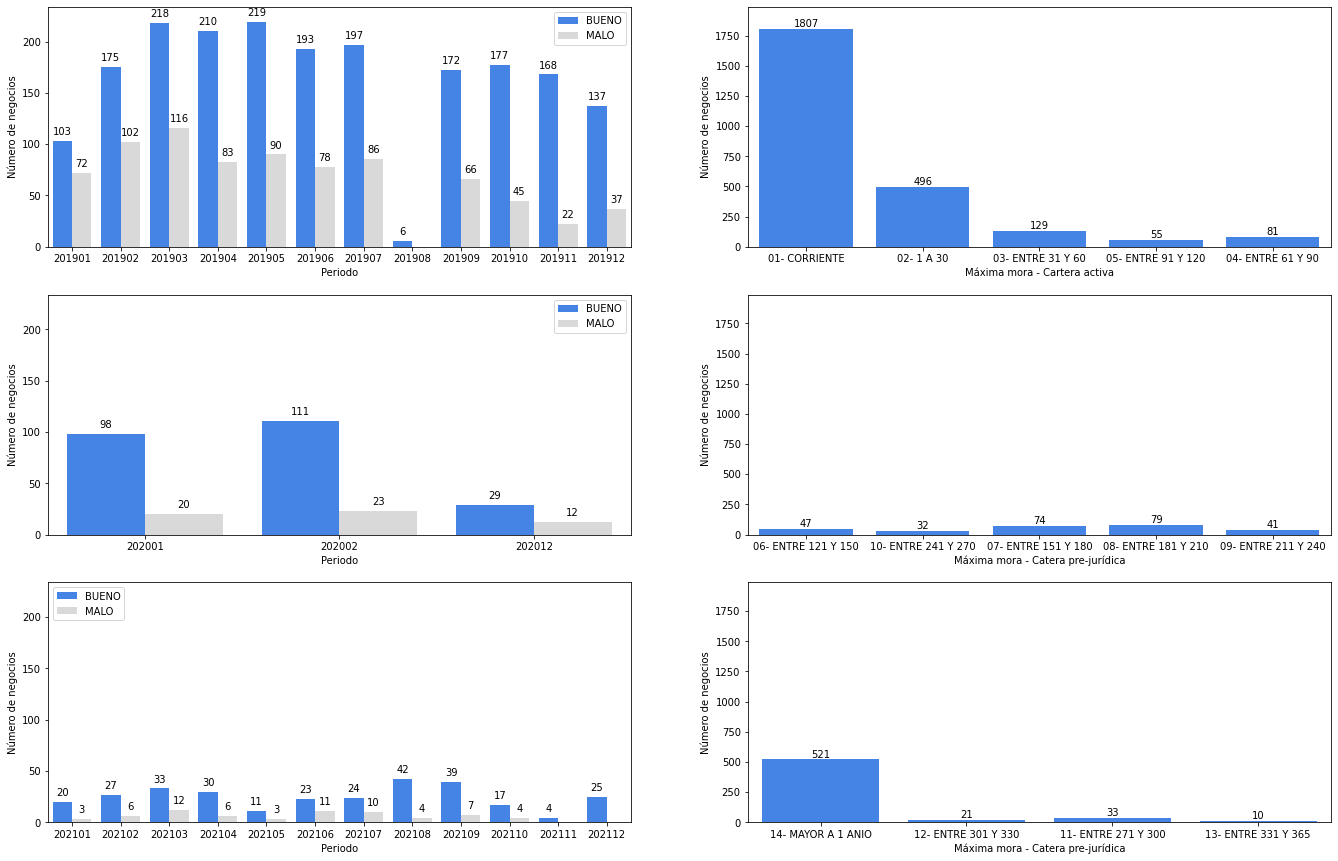

In [ ]:
# Eliminar los periodos que no se utilizarán por que fueron microcréditos otorgados durante la pandemia de COVID-19 (202003, 202009, 202010, 202011)
df = df.drop(df.index [(df ['periodo_desembolso']==202003)|(df ['periodo_desembolso']==202009)|(df ['periodo_desembolso']==202010)|(df ['periodo_desembolso']==202011)])

display(Latex("$Tamaño del dataframe:".replace(" "," \\ ") +str(df.shape)+"$"))
display(Latex("$ \\ $"))

graficar_negocios(df)

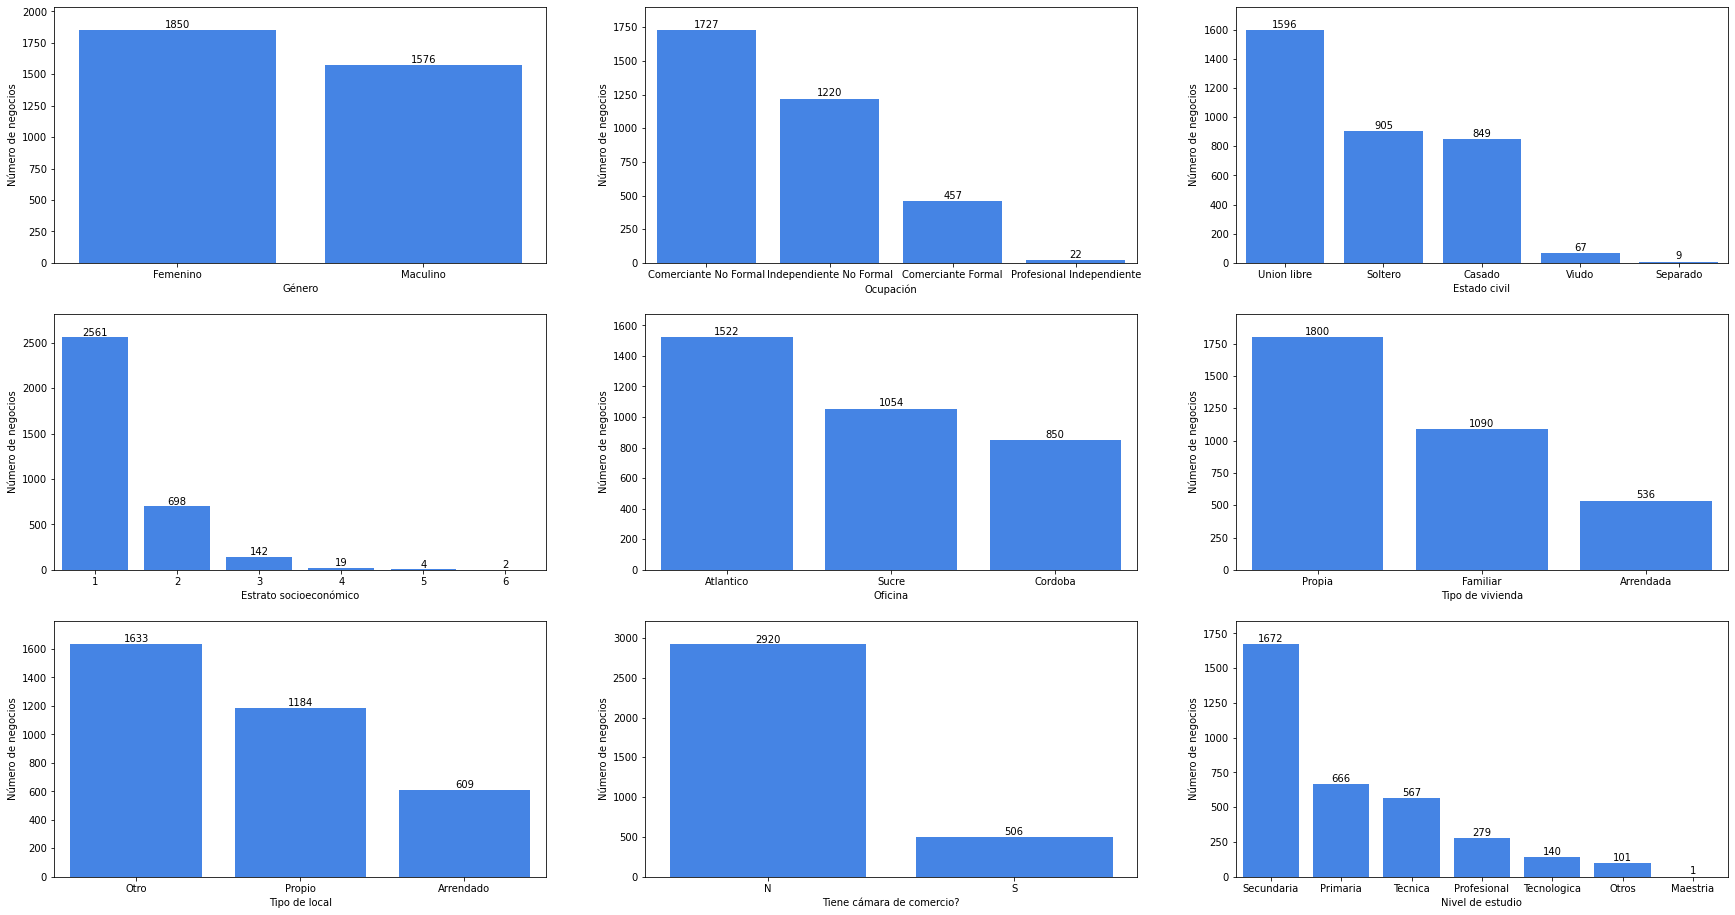

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 16), sharey=False)

g_0 = sns.countplot(ax=axes[0,0], x='genero', palette=["#2A7FFF"], data=df, order=df['genero'].value_counts().index);
axes[0,0].set_xlabel("Género")
axes[0,0].set_ylabel("Número de negocios")
axes[0,0].set_ylim(0, df["genero"].value_counts().max()*1.1)
mostrar_valores_barras(g_0, 10)

g_1 = sns.countplot(ax=axes[0,1], x='ocupacion', palette=["#2A7FFF"], data=df, order=df['ocupacion'].value_counts().index);
axes[0,1].set_xlabel("Ocupación")
axes[0,1].set_ylabel("Número de negocios")
axes[0,1].set_ylim(0, df["ocupacion"].value_counts().max()*1.1)
mostrar_valores_barras(g_1, 10)

g_2 = sns.countplot(ax=axes[0,2], x='estado_civil', palette=["#2A7FFF"], data=df, order=df['estado_civil'].value_counts().index);
axes[0,2].set_xlabel("Estado civil")
axes[0,2].set_ylabel("Número de negocios")
axes[0,2].set_ylim(0, df["estado_civil"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[1,0], x='estrato_socioeconomico', palette=["#2A7FFF"], data=df, order=df['estrato_socioeconomico'].value_counts().index);
axes[1,0].set_xlabel("Estrato socioeconómico")
axes[1,0].set_ylabel("Número de negocios")
axes[1,0].set_ylim(0, df["estrato_socioeconomico"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[1,1], x='oficina', palette=["#2A7FFF"], data=df, order=df['oficina'].value_counts().index);
axes[1,1].set_xlabel("Oficina")
axes[1,1].set_ylabel("Número de negocios")
axes[1,1].set_ylim(0, df["oficina"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[1,2], x='tipo_vivienda', palette=["#2A7FFF"], data=df, order=df['tipo_vivienda'].value_counts().index);
axes[1,2].set_xlabel("Tipo de vivienda")
axes[1,2].set_ylabel("Número de negocios")
axes[1,2].set_ylim(0, df["tipo_vivienda"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[2,0], x='tipo_local', palette=["#2A7FFF"], data=df, order=df['tipo_local'].value_counts().index);
axes[2,0].set_xlabel("Tipo de local")
axes[2,0].set_ylabel("Número de negocios")
axes[2,0].set_ylim(0, df["tipo_local"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[2,1], x='tiene_camara_comercio', palette=["#2A7FFF"], data=df, order=df['tiene_camara_comercio'].value_counts().index);
axes[2,1].set_xlabel("Tiene cámara de comercio?")
axes[2,1].set_ylabel("Número de negocios")
axes[2,1].set_ylim(0, df["tiene_camara_comercio"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

g_2 = sns.countplot(ax=axes[2,2], x='nivel_estudio', palette=["#2A7FFF"], data=df, order=df['nivel_estudio'].value_counts().index);
axes[2,2].set_xlabel("Nivel de estudio")
axes[2,2].set_ylabel("Número de negocios")
axes[2,2].set_ylim(0, df["nivel_estudio"].value_counts().max()*1.1)
mostrar_valores_barras(g_2, 10)

## **1.4. Limpieza de datos**

In [ ]:
def discretizar_columna_df(df_entrada, columna, columna_disc):
  """  
  Función para discretizar numéricamente una columna arrancando desde uno  
  Entrada: df_entrada   --> Dataframe con el dataset para el análisis
  Entrada; columna      --> Nombre de columna del Dataframe que se va a discretizar 
  Retorna: df_entrada   --> Retorna un dataframe con la columna discretizada  
  """
  df_car = pd.DataFrame()
  df_car["codigo"] = list(range(1,df_entrada[columna].unique().shape[0]+1))
  df_car["desc"] = df_entrada[columna].unique()

  for fila in range(df_car.shape[0]):
    df_entrada[columna_disc] = np.where(df[columna]==df_car["desc"][fila], df_car["codigo"][fila],df_entrada[columna_disc])
  return df_entrada

def discretizar_columna_desde_cero_df(df_entrada, columna, columna_disc):
  """  
  Función para discretizar numéricamente una columna arrancando desde cero  
  Entrada: df_entrada   --> Dataframe con el dataset para el análisis
  Entrada; columna      --> Nombre de columna del Dataframe que se va a discretizar 
  Retorna: df_entrada   --> Retorna un dataframe con la columna discretizada  
  """
  df_car = pd.DataFrame()
  df_car["codigo"] = sorted(list(range(df_entrada[columna].unique().shape[0])), reverse=True)
  df_car["desc"] = df_entrada[columna].unique()

  df_entrada[columna_disc] = 0
  for fila in range(df_car.shape[0]):
    df_entrada[columna_disc] = np.where(df[columna]==df_car["desc"][fila], int(df_car["codigo"][fila]),df_entrada[columna_disc])
  return df_entrada

def crear_one_hot_variable_categorizada(df_entrada, columna, array_valores):
  for i in range(array_valores.shape[0]):
    df_entrada.loc[df_entrada[columna] == array_valores[i],"es_"+array_valores[i].replace(" ","_").lower()] = 1
    df_entrada.loc[df_entrada[columna] != array_valores[i],"es_"+array_valores[i].replace(" ","_").lower()] = 0
  return df_entrada

df_clean = df

# Discretizar numéricamente columna genero 
df_clean = discretizar_columna_desde_cero_df(df_clean, "genero","genero_")

# OneHot columna estado_civil
df_clean = discretizar_columna_desde_cero_df(df_clean, "estado_civil","estado_civil_")
df_clean['estado_civil_'] = df['estado_civil_'].astype('int64')
df_clean = crear_one_hot_variable_categorizada(df_clean, "estado_civil", df_clean['estado_civil'].unique())

# Eliminar los nulos de la columna estado_civil (Solo hay 1 solo ejemplar)
df_clean = df_clean.drop(df_clean.index [df_clean['estado_civil'].isnull()])

# OneHot columna tipo_vivienda 
df_clean = discretizar_columna_desde_cero_df(df_clean, "tipo_vivienda","tipo_vivienda_")
df_clean = crear_one_hot_variable_categorizada(df_clean, "tipo_vivienda", df_clean['tipo_vivienda'].unique())
# Eliminar los nulos de la columna tipo_vivienda (Solo hay 1 solo ejemplar)
df_clean = df_clean.drop(df_clean.index [df_clean ['tipo_vivienda'].isnull()])
df_clean["tipo_vivienda"].unique()

df_clean["municipio_cliente"] = df_clean.oficina.str.cat(df_clean.municipio_cliente,sep="-")

# OneHot columna tipo_vivienda  columna nivel_estudio 
df_clean = discretizar_columna_desde_cero_df(df_clean, "nivel_estudio", "nivel_estudio_")
df_clean = crear_one_hot_variable_categorizada(df_clean, "nivel_estudio", df_clean['nivel_estudio'].unique())

# OneHot columna oficina 
df_clean = discretizar_columna_desde_cero_df(df_clean, "oficina", "oficina_")
df_clean = crear_one_hot_variable_categorizada(df_clean, "oficina", df_clean['oficina'].unique())

# OneHot columna ocupación 
df_clean = discretizar_columna_desde_cero_df(df_clean, "ocupacion", "ocupacion_")
df_clean = crear_one_hot_variable_categorizada(df_clean, "ocupacion", df_clean['ocupacion'].unique())

# Discretizar numéricamente columna tiene_camara_comercio 
df_clean = discretizar_columna_desde_cero_df(df_clean, "tiene_camara_comercio", "tiene_camara_comercio_")

# Discretizar numéricamente columna actividad
#df_clean = crear_one_hot_variable_categorizada(df_clean, "actividad", df_clean['actividad'].unique())
df_clean = discretizar_columna_desde_cero_df(df_clean, "actividad", "actividad_")

# Discretizar numéricamente columna tipo_local
df_clean = discretizar_columna_desde_cero_df(df_clean, "tipo_local", "tipo_local_")
df_clean = crear_one_hot_variable_categorizada(df_clean, "tipo_local", df_clean['tipo_local'].unique())

# Reemplazar los nulos y los -1 por cero en columna monto_promedio_oblig_sin_mc
df_clean = df_clean.fillna({"monto_promedio_oblig_sin_mc": 0})
df_clean["monto_promedio_oblig_sin_mc"] = df_clean["monto_promedio_oblig_sin_mc"].replace(-1,0)

# Reemplazar los nulos por cero en columna monto_promedio_oblig_mc
df_clean = df_clean.fillna({"monto_promedio_oblig_mc": 0})
df_clean["monto_promedio_oblig_mc"] = df_clean["monto_promedio_oblig_mc"].replace(-1,0)

# Reemplazar los nulos por cero en columna monto_promedio_oblig_real
df_clean = df_clean.fillna({"monto_promedio_oblig_real": 0})
df_clean["monto_promedio_oblig_real"] = df_clean["monto_promedio_oblig_real"].replace(-1,0)

# Reemplazar los nulos por cero en columna max_cupo_oblig_sin_mc
df_clean = df_clean.fillna({"max_cupo_oblig_sin_mc": 0})
df_clean["max_cupo_oblig_sin_mc"] = df_clean["max_cupo_oblig_sin_mc"].replace(-1,0)

# Reemplazar los nulos por cero en columna max_cupo_oblig_mc
df_clean = df_clean.fillna({"max_cupo_oblig_mc": 0})
df_clean["max_cupo_oblig_mc"] = df_clean["max_cupo_oblig_mc"].replace(-1,0)

# Reemplazar los nulos por cero en columna max_cupo_oblig_real
df_clean = df_clean.fillna({"max_cupo_oblig_real": 0})
df_clean["max_cupo_oblig_real"] = df_clean["max_cupo_oblig_real"].replace(-1,0)

# Reemplazar los nulos por cero en columna max_mora_ult_vector_oblig_abiertas_tc_rot	
df_clean = df_clean.fillna({"max_mora_ult_vector_oblig_abiertas_tc_rot": 0})

# Reemplazar los nulos por cero en columna max_mora_ult_vector_oblig_abiertas_banc_sin_mc
df_clean = df_clean.fillna({"max_mora_ult_vector_oblig_abiertas_banc_sin_mc": 0})

# Reemplazar los nulos por cero en columna max_mora_ult_vector_oblig_abiertas_mic	
df_clean = df_clean.fillna({"max_mora_ult_vector_oblig_abiertas_mic": 0})

# Reemplazar los nulos por cero en columna max_mora_ult_vector_oblig_abiertas_real	
df_clean = df_clean.fillna({"max_mora_ult_vector_oblig_abiertas_real": 0})

# Reemplazar los nulos por cero en columna max_mora_ult_vector_oblig_abiertas_telco
df_clean = df_clean.fillna({"max_mora_ult_vector_oblig_abiertas_telco": 0})

# Reemplazar los nulos por cero en columna max_mora_hist_oblig_tc_rot
df_clean = df_clean.fillna({"max_mora_hist_oblig_tc_rot": 0})

# Reemplazar los nulos por cero en columna max_mora_hist_oblig_banc_sin_mc
df_clean = df_clean.fillna({"max_mora_hist_oblig_banc_sin_mc": 0})

# Reemplazar los nulos por cero en columna max_mora_hist_oblig_mic
df_clean = df_clean.fillna({"max_mora_hist_oblig_mic": 0})

# Reemplazar los nulos por cero en columna max_mora_hist_oblig_real
df_clean = df_clean.fillna({"max_mora_hist_oblig_real": 0})

# Reemplazar los nulos por cero en columna max_mora_hist_oblig_telco
df_clean = df_clean.fillna({"max_mora_hist_oblig_telco": 0})

# Reemplazar los nulos por cero en columna oblig_mora_hist_30_tc_rot
df_clean = df_clean.fillna({"oblig_mora_hist_30_tc_rot": 0})

# Reemplazar los nulos por cero en columna oblig_mora_hist_30_banc_sin_mc
df_clean = df_clean.fillna({"oblig_mora_hist_30_banc_sin_mc": 0})	

# Reemplazar los nulos por cero en columna oblig_mora_hist_30_mc	
df_clean = df_clean.fillna({"oblig_mora_hist_30_mc": 0})

# Reemplazar los nulos por cero en columna oblig_mora_hist_30_real	
df_clean = df_clean.fillna({"oblig_mora_hist_30_real": 0})

# Reemplazar los nulos por cero en columna oblig_mora_hist_30_telco
df_clean = df_clean.fillna({"oblig_mora_hist_30_telco": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_60_tc_rot
df_clean = df_clean.fillna({"oblig_mora_hist_60_tc_rot": 0})	
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_60_banc_sin_mc
df_clean = df_clean.fillna({"oblig_mora_hist_60_banc_sin_mc": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_60_mc
df_clean = df_clean.fillna({"oblig_mora_hist_60_mc": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_60_real
df_clean = df_clean.fillna({"oblig_mora_hist_60_real": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_60_telco
df_clean = df_clean.fillna({"oblig_mora_hist_60_telco": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_m_90_tc_rot
df_clean = df_clean.fillna({"oblig_mora_hist_m_90_tc_rot": 0})

# Reemplazar los nulos por cero en columna oblig_mora_hist_m_90_banc_sin_mc
df_clean = df_clean.fillna({"oblig_mora_hist_m_90_banc_sin_mc": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_m_90_mc
df_clean = df_clean.fillna({"oblig_mora_hist_m_90_mc": 0})
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_m_90_real
df_clean = df_clean.fillna({"oblig_mora_hist_m_90_real": 0})	
	
# Reemplazar los nulos por cero en columna oblig_mora_hist_m_90_telco
df_clean = df_clean.fillna({"oblig_mora_hist_m_90_telco": 0})

# Discretizar numéricamente columna reincidencia_mora_tc_rot
df_clean = discretizar_columna_desde_cero_df(df_clean, "reincidencia_mora_tc_rot", "reincidencia_mora_tc_rot_")
#df_clean['reincidencia_mora_tc_rot_'] = df['reincidencia_mora_tc_rot_'].astype('int64')

# Discretizar numéricamente columna reincidencia_mora_banc_sin_mc
df_clean = discretizar_columna_desde_cero_df(df_clean, "reincidencia_mora_banc_sin_mc", "reincidencia_mora_banc_sin_mc_")
#df_clean['reincidencia_mora_banc_sin_mc_'] = df['reincidencia_mora_banc_sin_mc_'].astype('int64')

# Discretizar numéricamente columna reincidencia_mora_mc
df_clean = discretizar_columna_desde_cero_df(df_clean, "reincidencia_mora_mc", "reincidencia_mora_mc_")
#df_clean['reincidencia_mora_mc_'] = df['reincidencia_mora_mc_'].astype('int64')

# Discretizar numéricamente columna reincidencia_mora_real
df_clean = discretizar_columna_desde_cero_df(df_clean, "reincidencia_mora_real", "reincidencia_mora_real_")
#df_clean['reincidencia_mora_real_'] = df['reincidencia_mora_real_'].astype('int64')

# Discretizar numéricamente columna reincidencia_mora_telco
df_clean = discretizar_columna_desde_cero_df(df_clean, "reincidencia_mora_telco", "reincidencia_mora_telco_")
#df_clean['reincidencia_mora_telco_'] = df['reincidencia_mora_telco_'].astype('int64')

# Discretizar numéricamente columna tipo_cliente
df_clean = discretizar_columna_desde_cero_df(df_clean, "tipo_cliente","tipo_cliente_")

df_clean_initial = df_clean.copy()

In [ ]:
df_clean.reset_index(inplace=True, drop=True)

display(Latex("$Tamaño del dataframe después de la limpieza:".replace(" "," \\ ") +str(df_clean.shape)+"$"))
display(Latex("$ \\ $"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

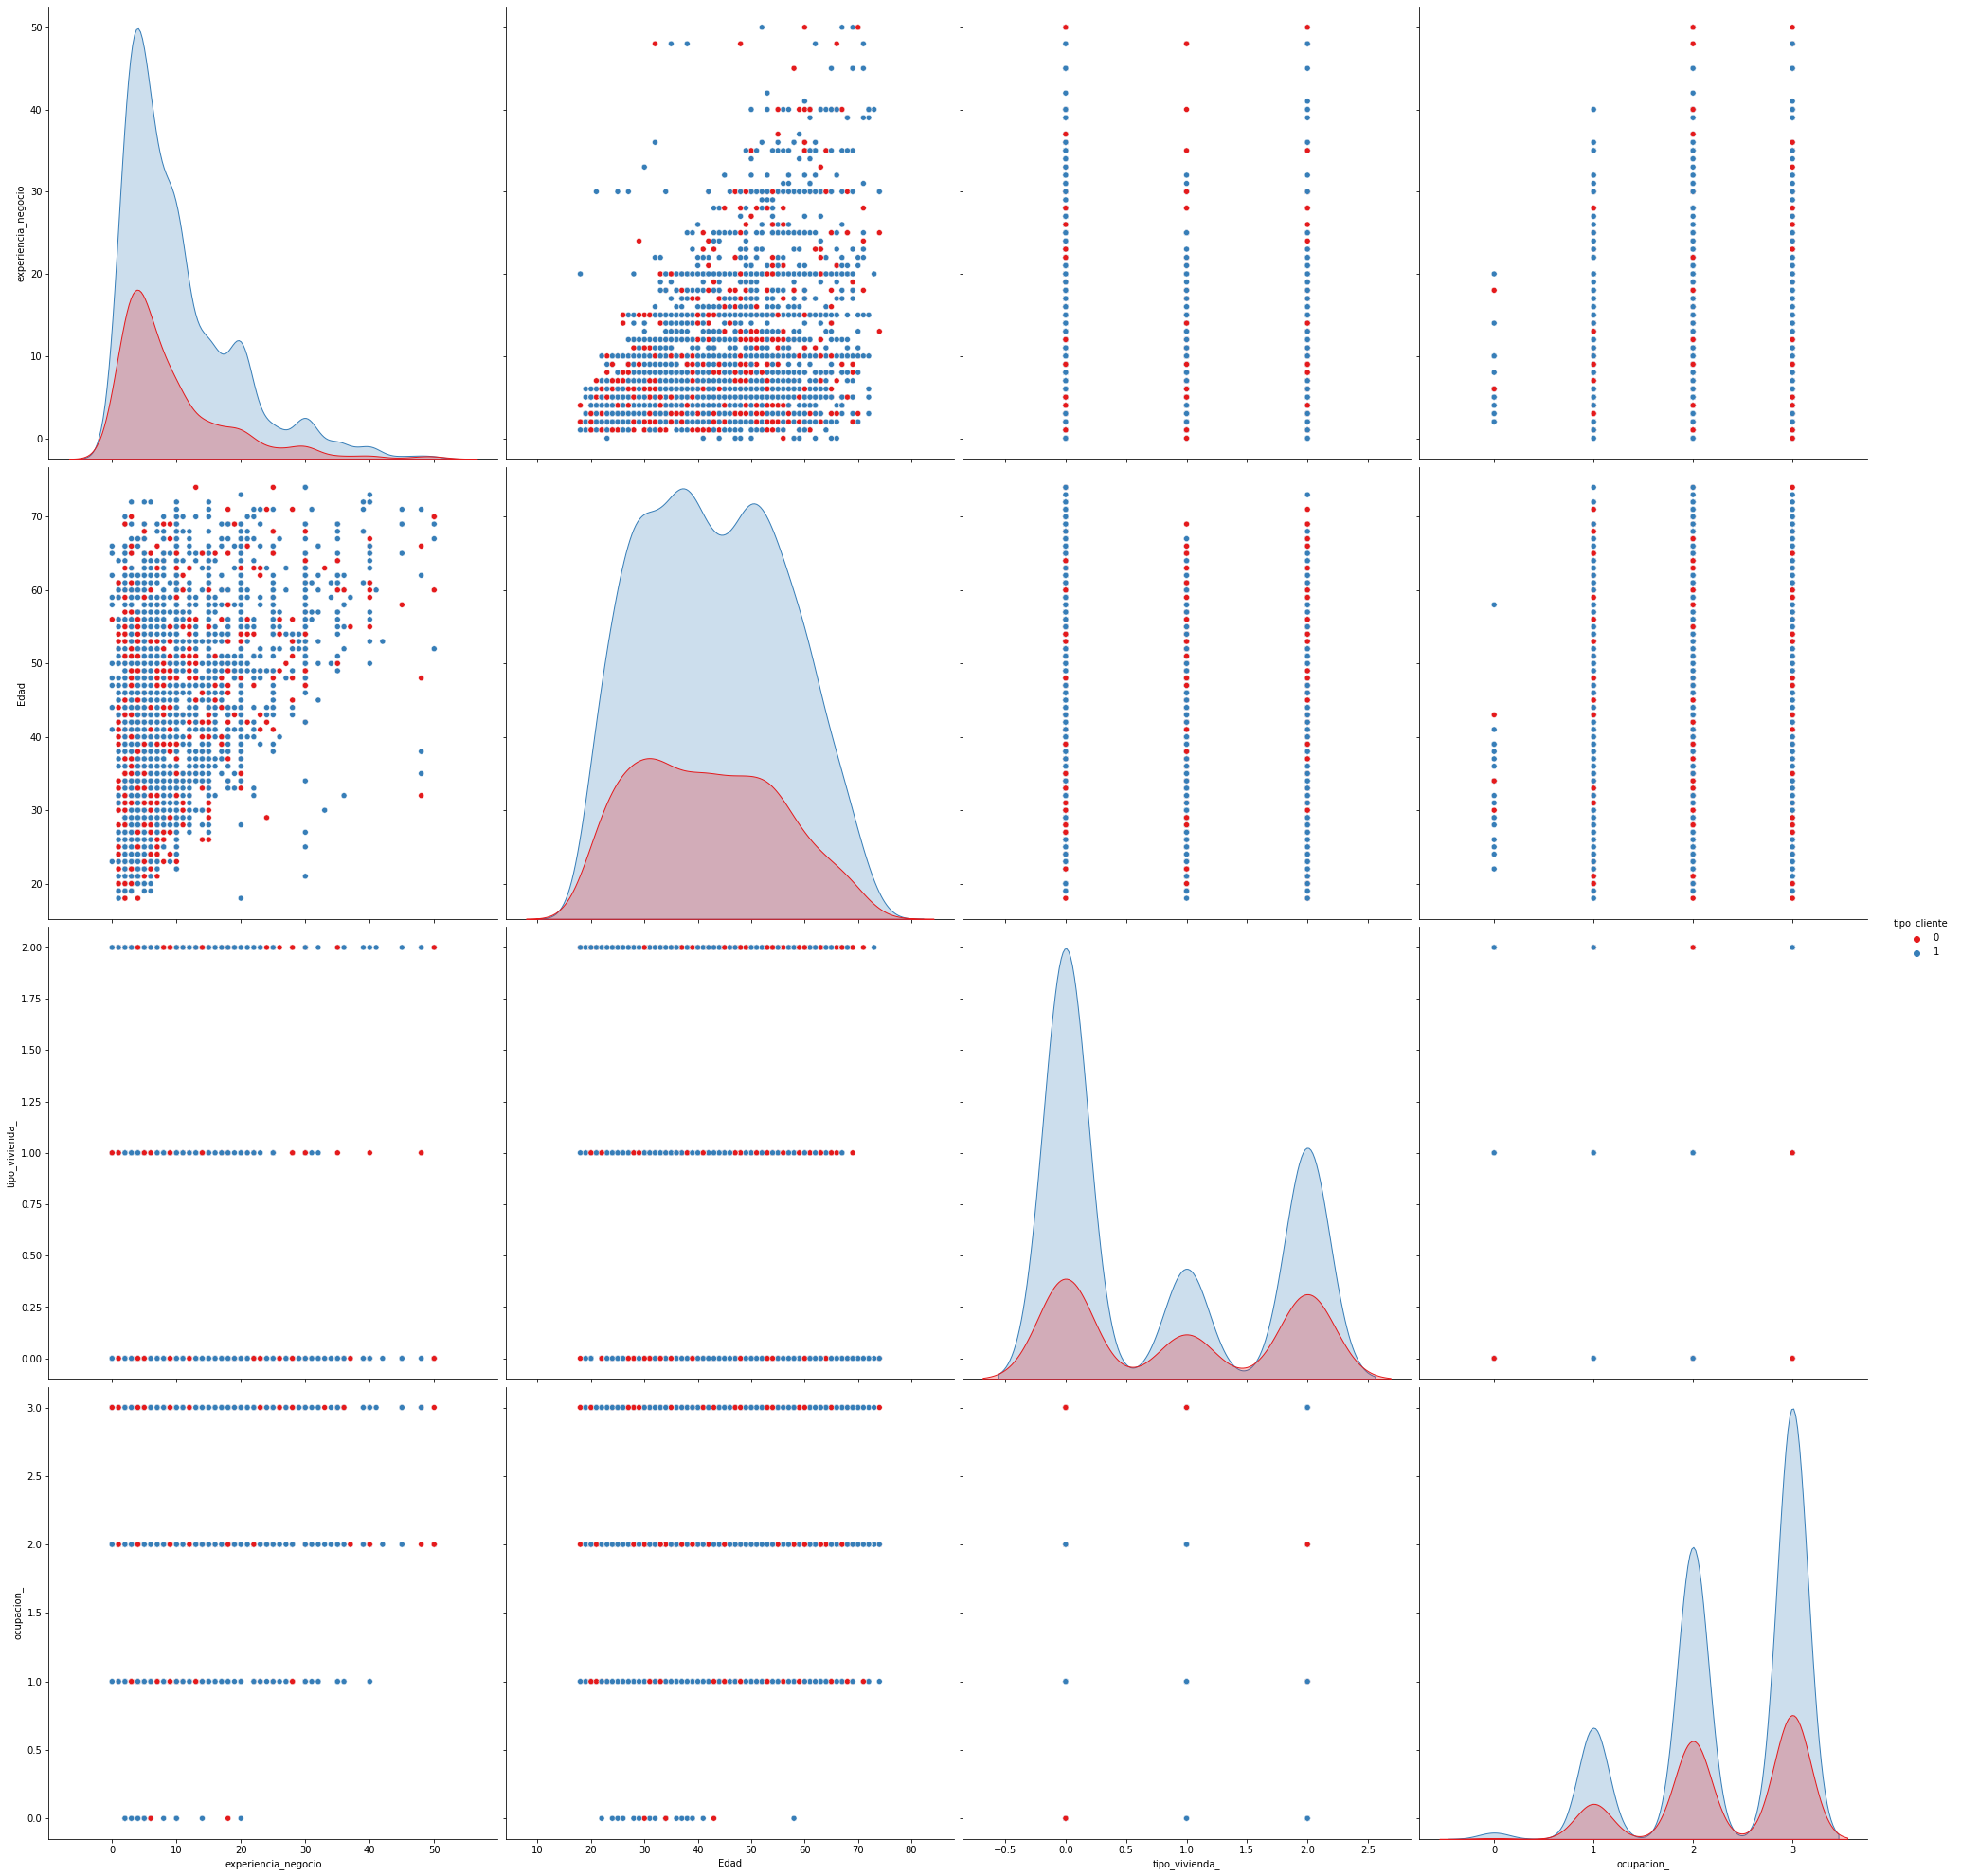

In [ ]:
def graficar_distribucion_puntos(df_entrada):
  sns.pairplot(df_entrada.dropna(),hue='tipo_cliente_',height=7,vars=["experiencia_negocio","Edad","tipo_vivienda_", "ocupacion_"])

graficar_distribucion_puntos(df_clean_initial)

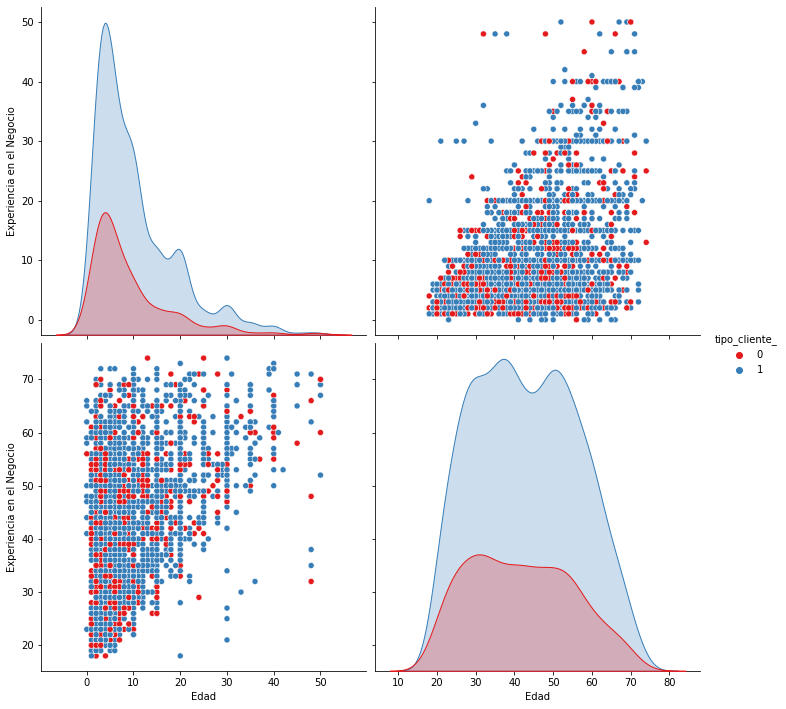

In [ ]:
g = sns.pairplot(df_clean_initial.dropna(),hue='tipo_cliente_',height=5,vars=["experiencia_negocio","Edad"])
sns.axes_style("darkgrid")
sns.set_context("paper", rc={"axes.labelsize":20})
for ax in g.axes.flat: # iterate over all axes object of pairplot
    ax.set_ylabel("Experiencia en el Negocio")
    ax.set_xlabel("Edad")

## **1.5. Matriz de correlación**

## **1.5.1. Correlación de variables sociodemográficas**

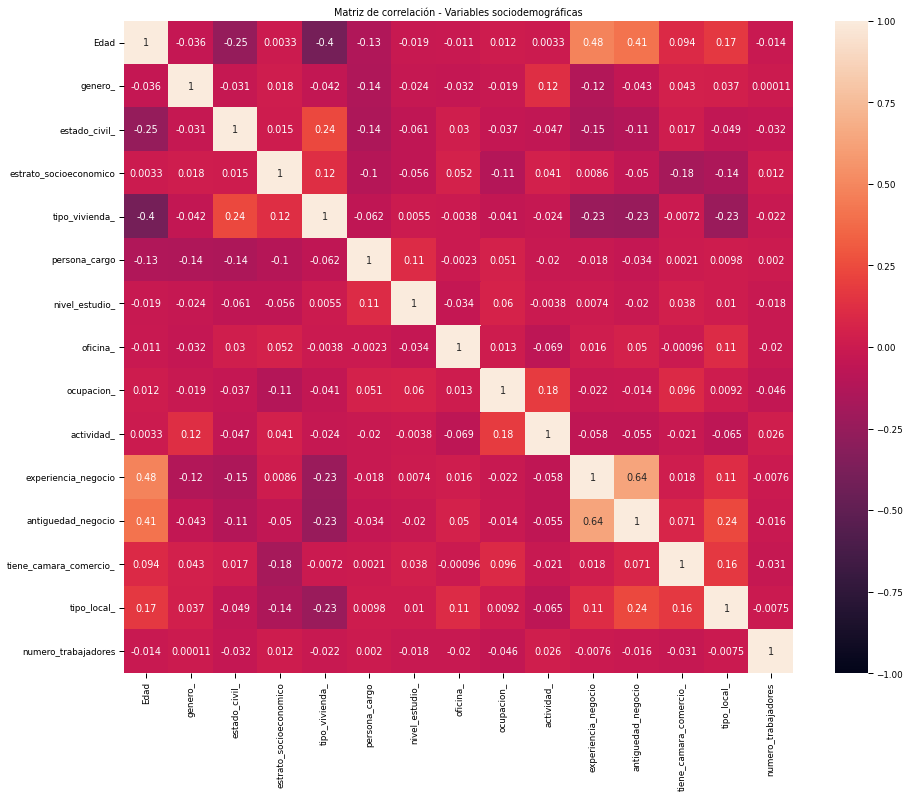

In [ ]:
def generar_matriz_corr_sociodemografico(df_entrada):
  df_sociodemografico = df_entrada[["Edad","genero_","estado_civil_","estrato_socioeconomico","tipo_vivienda_","persona_cargo"
                                  ,"nivel_estudio_","oficina_","ocupacion_","actividad_","experiencia_negocio"
                                  ,"antiguedad_negocio","tiene_camara_comercio_","tipo_local_","numero_trabajadores"]]
  fig,axes = plt.subplots(figsize=(15,12))                          
  g = sns.heatmap(df_sociodemografico.corr(), vmin=-1, vmax=1, annot=True)
  g.set_title("Matriz de correlación - Variables sociodemográficas")
generar_matriz_corr_sociodemografico(df_clean)

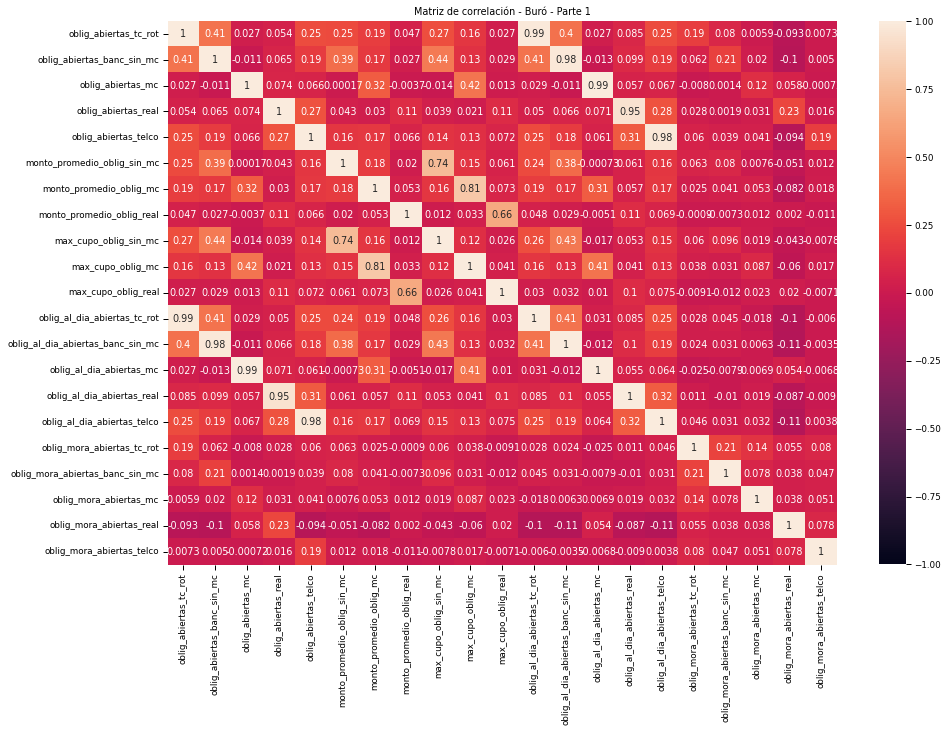

In [ ]:
def generar_matriz_corr_buro1(df):
  df_buro_1 = df[["oblig_abiertas_tc_rot","oblig_abiertas_banc_sin_mc"
                  ,"oblig_abiertas_mc","oblig_abiertas_real","oblig_abiertas_telco" 
                  ,"monto_promedio_oblig_sin_mc","monto_promedio_oblig_mc"
                  ,"monto_promedio_oblig_real","max_cupo_oblig_sin_mc","max_cupo_oblig_mc","max_cupo_oblig_real"
                  ,"oblig_al_dia_abiertas_tc_rot","oblig_al_dia_abiertas_banc_sin_mc","oblig_al_dia_abiertas_mc"
                  ,"oblig_al_dia_abiertas_real","oblig_al_dia_abiertas_telco"
                  ,"oblig_mora_abiertas_tc_rot"
                  ,"oblig_mora_abiertas_banc_sin_mc","oblig_mora_abiertas_mc","oblig_mora_abiertas_real","oblig_mora_abiertas_telco"
                ]]
  fig,axes = plt.subplots(figsize=(15,10))
  g = sns.heatmap(data=df_buro_1.corr(), vmin=-1, vmax=1, annot=True)
  
  g.set_title("Matriz de correlación - Buró - Parte 1")
   
generar_matriz_corr_buro1(df_clean)

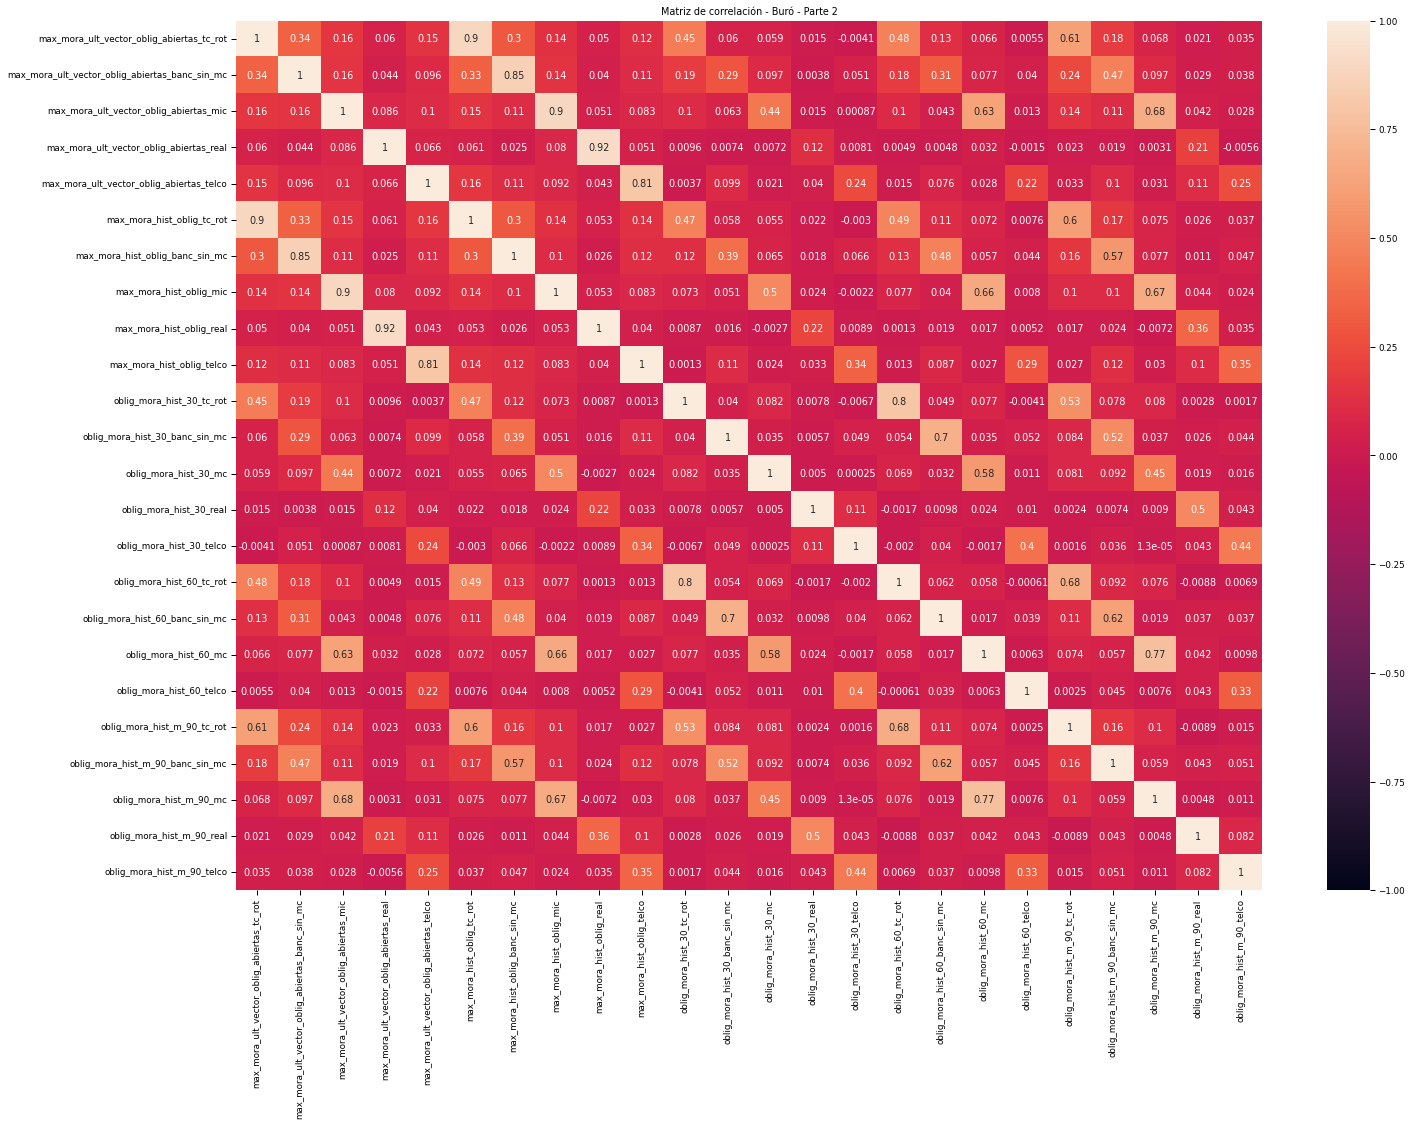

In [ ]:
def generar_matriz_corr_buro2(df):

  df_buro_2 = df[["max_mora_ult_vector_oblig_abiertas_tc_rot", "max_mora_ult_vector_oblig_abiertas_banc_sin_mc"
                  ,"max_mora_ult_vector_oblig_abiertas_mic","max_mora_ult_vector_oblig_abiertas_real","max_mora_ult_vector_oblig_abiertas_telco"
                  ,"max_mora_hist_oblig_tc_rot","max_mora_hist_oblig_banc_sin_mc","max_mora_hist_oblig_mic","max_mora_hist_oblig_real"
                  ,"max_mora_hist_oblig_telco","oblig_mora_hist_30_tc_rot","oblig_mora_hist_30_banc_sin_mc","oblig_mora_hist_30_mc","oblig_mora_hist_30_real"
                  ,"oblig_mora_hist_30_telco","oblig_mora_hist_60_tc_rot","oblig_mora_hist_60_banc_sin_mc","oblig_mora_hist_60_mc" #,"oblig_mora_hist_60_real"
                  ,"oblig_mora_hist_60_telco","oblig_mora_hist_m_90_tc_rot","oblig_mora_hist_m_90_banc_sin_mc","oblig_mora_hist_m_90_mc"
                  ,"oblig_mora_hist_m_90_real","oblig_mora_hist_m_90_telco" #,"reincidencia_mora_tc_rot"
                  ,"reincidencia_mora_banc_sin_mc","reincidencia_mora_mc","reincidencia_mora_real","reincidencia_mora_telco"]]
  
  fig,axes = plt.subplots(figsize=(23,16))
  g = sns.heatmap(data=df_buro_2.corr(), vmin=-1, vmax=1, annot=True)
  
  g.set_title("Matriz de correlación - Buró - Parte 2")
   
generar_matriz_corr_buro2(df_clean)

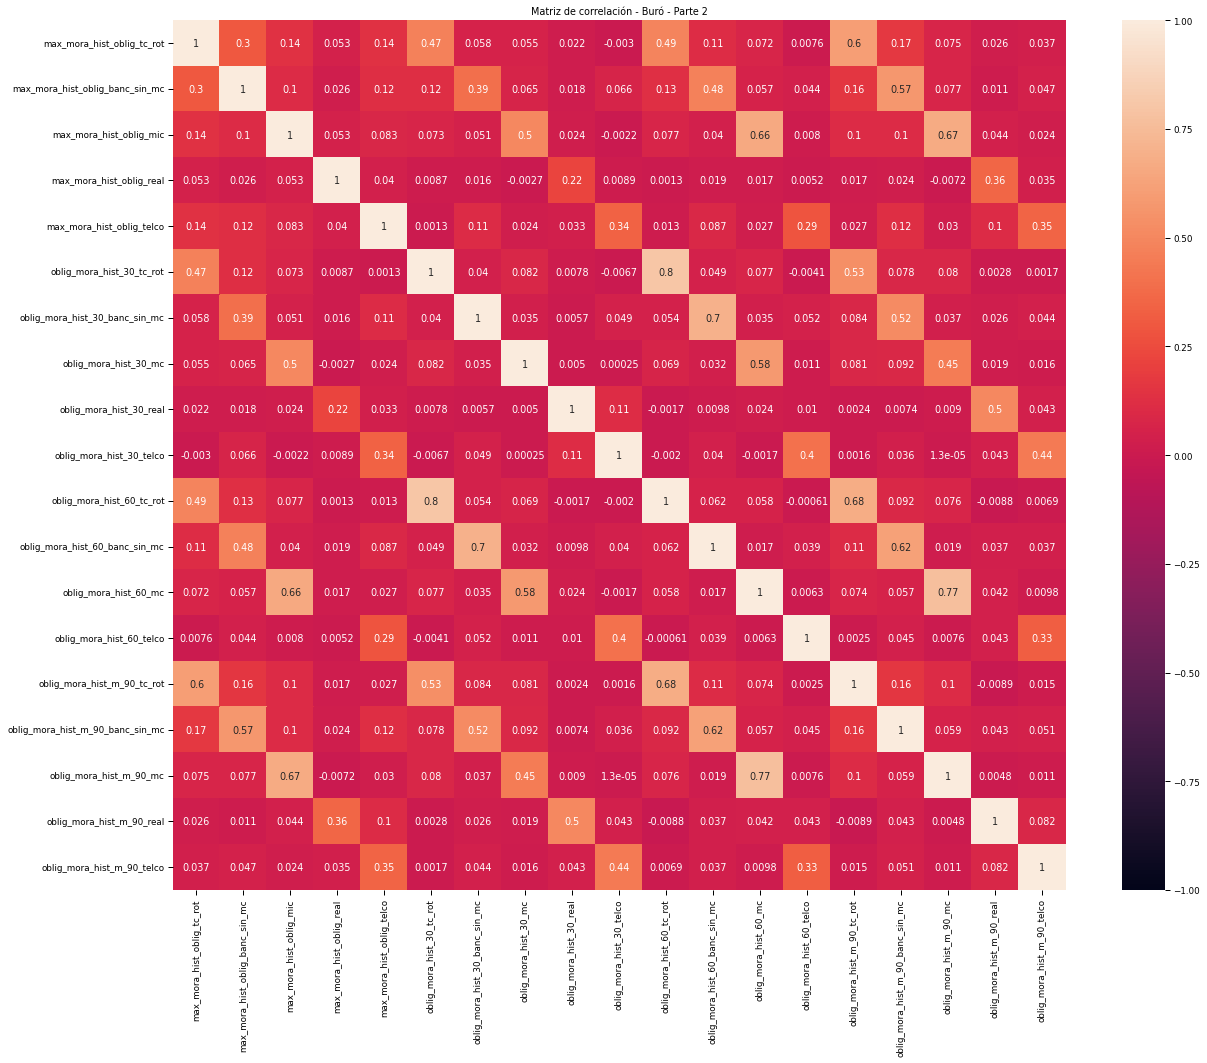

In [ ]:
def generar_matriz_corr_optimizada(df):
  df_buro_2 = df[["max_mora_hist_oblig_tc_rot","max_mora_hist_oblig_banc_sin_mc","max_mora_hist_oblig_mic","max_mora_hist_oblig_real"
                ,"max_mora_hist_oblig_telco","oblig_mora_hist_30_tc_rot","oblig_mora_hist_30_banc_sin_mc","oblig_mora_hist_30_mc","oblig_mora_hist_30_real"
                ,"oblig_mora_hist_30_telco","oblig_mora_hist_60_tc_rot","oblig_mora_hist_60_banc_sin_mc","oblig_mora_hist_60_mc" #,"oblig_mora_hist_60_real"
                ,"oblig_mora_hist_60_telco","oblig_mora_hist_m_90_tc_rot","oblig_mora_hist_m_90_banc_sin_mc","oblig_mora_hist_m_90_mc"
                ,"oblig_mora_hist_m_90_real","oblig_mora_hist_m_90_telco" #,"reincidencia_mora_tc_rot"
                ,"reincidencia_mora_banc_sin_mc","reincidencia_mora_mc","reincidencia_mora_real","reincidencia_mora_telco"]]
  
  fig,axes = plt.subplots(figsize=(20,16))
  g = sns.heatmap(data=df_buro_2.corr(), vmin=-1, vmax=1, annot=True)

  g.set_title("Matriz de correlación - Buró - Parte 2")


#df[["max_mora_ult_vector_oblig_abiertas, max_mora_ult_vector_oblig_abiertas_tc_rot, max_mora_ult_vector_oblig_abiertas_banc_sin_mc, max_mora_ult_vector_oblig_abiertas_banc_si_mc, max_mora_ult_vector_oblig_abiertas_real"]]

generar_matriz_corr_optimizada(df_clean)
#df[["max_mora_ult_vector_oblig_abiertas, max_mora_ult_vector_oblig_abiertas_tc_rot, max_mora_ult_vector_oblig_abiertas_banc_sin_mc, max_mora_ult_vector_oblig_abiertas_banc_si_mc, max_mora_ult_vector_oblig_abiertas_real"]]


In [ ]:
df_estado_civil = pd.DataFrame(columns={"Estado civil"},data=df["estado_civil"].unique())
df_estado_civil

,Estado civil
0,Soltero
1,Union libre
2,Casado
3,Viudo
4,Separado


In [ ]:
df_clean[["cod_neg","es_soltero","es_casado", "es_union_libre", "es_viudo", "es_separado"]]

,cod_neg,es_soltero,es_casado,es_union_libre,es_viudo,es_separado
0,MC0045556,1.0,0.0,0.0,0.0,0.0
1,MC0045565,0.0,0.0,1.0,0.0,0.0
2,MC0045711,0.0,0.0,1.0,0.0,0.0
3,MC18170,0.0,0.0,1.0,0.0,0.0
4,MC18277,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
3421,MC20705,0.0,0.0,1.0,0.0,0.0
3422,MC20713,1.0,0.0,0.0,0.0,0.0
3423,MC20760,0.0,0.0,1.0,0.0,0.0
3424,MC20792,0.0,0.0,1.0,0.0,0.0


## **1.4. Scalling**

In [ ]:
def scalling(X):
  """ 
  Función para Scalling Min - Max 
  Entrada: X --> Arreglo de entrada con dimensiones: (m,n) 
  Retorna:   --> Retorna el arreglo resultante después de aplicar el escalamiento entre 0 y 1
  """
  for i in range(X.shape[1]):
    Xmin = np.min(X[:,i])
    Xmax = np.max(X[:,i])
    #print(str(i)+"-"+str(Xmin)+"-"+str(Xmax))
    X[:,i] = (X[:,i]-Xmin) / (Xmax - Xmin)
  
  return X

## **1.5.	Crear los Dataframe y arreglos $X$ y $y$ para entrenamiento y pruebas.**


In [ ]:
#Quitar columnas del oneHot  
df_clean.drop("estado_civil",inplace=True, axis=1)
df_clean.drop("tipo_vivienda",inplace=True, axis=1)
df_clean.drop("nivel_estudio",inplace=True, axis=1)
df_clean.drop("oficina",inplace=True, axis=1)
df_clean.drop("ocupacion",inplace=True, axis=1)
df_clean.drop("tipo_local",inplace=True, axis=1)

df_clean.drop("genero",inplace=True, axis=1)
df_clean.drop("estado_civil_",inplace=True, axis=1)
df_clean.drop("tipo_vivienda_",inplace=True, axis=1)
df_clean.drop("nivel_estudio_",inplace=True, axis=1)
df_clean.drop("oficina_",inplace=True, axis=1)
df_clean.drop("ocupacion_",inplace=True, axis=1)
df_clean.drop("tipo_local_",inplace=True, axis=1)
df_clean.drop("tiene_camara_comercio",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_banc_sin_mc",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_mc",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_real",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_telco",inplace=True, axis=1)

#Quitar columnas correlacionadas
df_clean.drop("antiguedad_negocio",inplace=True, axis=1)
df_clean.drop("max_mora_ult_vector_oblig_abiertas_tc_rot",inplace=True, axis=1)
df_clean.drop("max_mora_ult_vector_oblig_abiertas_banc_sin_mc",inplace=True, axis=1)
df_clean.drop("max_mora_ult_vector_oblig_abiertas_mic",inplace=True, axis=1)
df_clean.drop("max_mora_ult_vector_oblig_abiertas_real",inplace=True, axis=1)
df_clean.drop("max_mora_ult_vector_oblig_abiertas_telco",inplace=True, axis=1)
df_clean.drop("oblig_abiertas_tc_rot",inplace=True, axis=1)
df_clean.drop("oblig_abiertas_banc_sin_mc",inplace=True, axis=1)
df_clean.drop("oblig_abiertas_mc",inplace=True, axis=1)
df_clean.drop("oblig_abiertas_real",inplace=True, axis=1)
df_clean.drop("oblig_abiertas_telco",inplace=True, axis=1)
df_clean.drop("max_cupo_oblig_sin_mc",inplace=True, axis=1)
df_clean.drop("max_cupo_oblig_mc",inplace=True, axis=1)
df_clean.drop("max_cupo_oblig_real",inplace=True, axis=1)

#Quitar columnas correlacionadas
df_clean.drop("tipo_cliente",inplace=True, axis=1)

#Quitar columnas que no aportan al modelo
df_clean.drop("monto",inplace=True, axis=1)
df_clean.drop("plazo",inplace=True, axis=1)
df_clean.drop("valor_cuota",inplace=True, axis=1)
df_clean.drop("municipio_cliente",inplace=True, axis=1)
df_clean.drop("actividad",inplace=True, axis=1)
df_clean.drop("actividad_",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_tc_rot",inplace=True, axis=1)
df_clean.drop("reincidencia_mora_tc_rot_",inplace=True, axis=1)
df_clean.drop("oblig_mora_hist_60_real",inplace=True, axis=1)
df_clean.drop("tiempo_vivienda",inplace=True, axis=1)

In [ ]:
def crear_dataframes_train_test(df_entrada):
  """
  Función que toma el Dataframe y crea el dataset de entrenamiento, dataset de prueba y luego los divide en 2 (Uno para las características df_X y otro para las etiquetas df_y) 
  
  Entrada: df   --> Dataframe con el dataset para el análisis
  Retorna: df_train   --> Retorna un dataframe con los datos de entrenamientos
  Retorna: df_test    --> Retorna un dataframe con los datos de prueba
  Retorna: df_X_train --> Retorna un dataframe con las columnas que pertenecen a las características del dataset de entrenamiento
  Retorna: df_y_train --> Retorna un dataframe con las columnas que pertenecen a las etiquetas del dataset de entrenamiento
  Retorna: X_train    --> Arreglo numpy con las características del dataset de entrenamiento
  Retorna: y_train    --> Arreglo numpy con las etiquetas del dataset de entrenamiento
  Retorna: df_X_test  --> Retorna un dataframe con las columnas que pertenecen a las características del dataset de pruebas
  Retorna: df_y_test  --> Retorna un dataframe con las columnas que pertenecen a las etiquetas del dataset de pruebas
  Retorna: X_test     --> Arreglo numpy con las características del dataset de pruebas
  Retorna: y_test     --> Arreglo numpy con las etiquetas del dataset de pruebas
  
  """
  #Construir el dataframe de entrenamiento 
  df_train = df_entrada[df_entrada["cod_neg"].index <= int(round(df_entrada.shape[0]*0.85,0))]
  

  #Construir el dataframe de prueba 
  df_test = df_entrada[df_entrada["cod_neg"].index > int(round(df_entrada.shape[0]*0.85,0))]
   
  df_X = df_entrada.iloc[:,df_entrada.columns.get_loc("Edad"):df_entrada.shape[1]]
  df_X.drop("tipo_cliente_",inplace=True, axis=1)
  
  X = np.array(df_X)
  X = scalling(X)

  #X_train = X[0:round(df_entrada.shape[0]*0.85)+1]
  X_train = X[0:round(df_entrada.shape[0]*0.85)+1]
  X_test = X[round(df_entrada.shape[0]*0.85)+1:df_entrada.shape[0]]

  df_X_train = df_X[df_X["Edad"].index <= int(round(df_X.shape[0]*0.85,0))]
  
  df_y_train = df_train[["tipo_cliente_"]]
  y_train = df_y_train["tipo_cliente_"].values

  df_X_test = df_X[round(df_X.shape[0]*0.85)+1:df_X.shape[0]]               
  
  df_y_test = df_test[["tipo_cliente_"]]
  y_test = df_y_test["tipo_cliente_"].values

  return df_train, df_test, df_X_train, df_y_train, X_train, y_train, df_X_test, df_y_test, X_test, y_test

df_train, df_test, df_X_train, df_y_train, X_train, y_train, df_X_test, df_y_test, X_test, y_test = crear_dataframes_train_test(df_clean)

In [ ]:
# Mostrar el contenido del dataframe de las características df_X en salida Latex y visual
display(Latex("$Tamaño del dataframe de entrenamiento (X):".replace(" "," \\ ") +str(df_X_train.shape)+"$"))
display(Latex("$ \\ $"))
df_X_train.head(5)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,Edad,estrato_socioeconomico,persona_cargo,experiencia_negocio,numero_trabajadores,tasa,cuentas_embargadas,monto_promedio_oblig_sin_mc,monto_promedio_oblig_mc,monto_promedio_oblig_real,...,es_comerciante_formal,es_profesional_independiente,tiene_camara_comercio_,es_propio,es_otro,es_arrendado,reincidencia_mora_banc_sin_mc_,reincidencia_mora_mc_,reincidencia_mora_real_,reincidencia_mora_telco_
0,57,2,0,12,0,3.5,0,0.0,1042000.0,0.0,...,0.0,0.0,1,1.0,0.0,0.0,1,1,1,1
1,26,1,0,3,0,3.5,0,4000000.0,2120000.0,125000.0,...,0.0,0.0,1,1.0,0.0,0.0,1,1,1,1
2,26,1,2,5,0,3.5,0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,1.0,0.0,1,1,1,1
3,21,2,1,30,0,3.5,0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,1.0,0.0,1,1,1,1
4,22,2,0,7,0,3.2,0,0.0,0.0,0.0,...,0.0,0.0,1,0.0,1.0,0.0,1,1,1,1


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

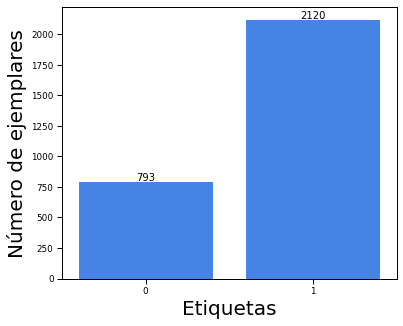

In [ ]:
def graficar_etiquetas(df_entrada):
  """  
  Función que crea la gráfica de las etiquetas
  Entrada: df   --> Dataframe con el que se van a realizar las gráficas
  Retorna: La gráfica Sns.countplot de los ejemplares por etiquetas
  """
  fig,ax = plt.subplots(figsize=(6,5))
  g = sns.countplot(x='tipo_cliente_', palette=["#2A7FFF"], data=df_entrada);
  plt.xlabel("Etiquetas")
  plt.ylabel("Número de ejemplares")
  mostrar_valores_barras(g, 5)

# Mostrar el contenido del dataframe de las etiquetas df_y en salida Latex y visual
display(Latex("$Tamaño del dataframe de etiquetas (y) :".replace(" "," \\ ") +str(df_y_train.shape)+"$"))
display(Latex("$ \\ $"))

graficar_etiquetas(df_y_train)

In [ ]:
def identacion(num_identacion=1):
  """
  Función para colocar identación en texto en formato Latex
  Entrada: num_identacion   --> Número de identaciones
  Retorna: identacion_latex --> Texto en formato Latex que permite realizar la identación
  """
  identacion_latex = num_identacion * 3 * ' '
  return identacion_latex

def mostrar_array_latex(arrayN, nombre_arrayN):
  """
  Función para mostrar un numpy array como Latex
  Entrada: matrix        --> Array Numpy
  Entrada: nombre_matrix --> Número de identaciones
  Retorna: Latex --> Texto en formato Latex que permite visualizar el arreglo numpy
  """
  style = r"\displaystyle" + "\n"
  left_latex = style + identacion() + r"\left(" + "\n" + identacion(2) + r"\begin{array}"
  right_latex = identacion(2) + r"\end{array}" + "\n" + identacion() + r"\right)"
  m_cols = arrayN.shape[1]
  array_cols = "{" + "r "* m_cols + "}\n"
  elements_latex = ""

  for fila in arrayN:
    elements_latex = elements_latex + identacion(3) + "& ".join([str(x) for x in fila]) + r" \\ "+ "\n"
    latex = nombre_arrayN + left_latex + array_cols + elements_latex + right_latex
  return f"$\n{latex}\n$"

In [ ]:
Math(mostrar_array_latex(X_train[0:20],"X ="))

<IPython.core.display.Math object>

# **2. GDA**

## **2.1. Construir las funciones para obtener los parámetros de GDA:  ϕ ,  μ0 ,  μ1  y  Σ**

### **2.1.1. Cálculo de $μ_0$ y $μ_1$**


## $\mu_0$ = $\frac{\sum_{i=1}^{m}1\{y^{(i)} = 0\}x^{(i)}}{\sum_{i=1}^{m}1\{y^{(i)} = 0\}}$,  $\\\mu_1$ = $\frac{\sum_{i=1}^{m}1\{y^{(i)} = 1\}x^{(i)}}{\sum_{i=1}^{m}1\{y^{(i)} = 1\}}$

In [ ]:
def calcular_vector_medias(X, y):
  """
  Función para calcular el vector de medias necesarios para los cálculos en el modelo GDA
  Entrada: X    --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: y    --> Arreglo con las y que tiene valores 0 o 1. Dimensiones: (m,1)
  Retorna: mu_0 --> Arreglo de longitud (1, n) que almacenan mu_0
  Retorna: mu_1 --> Arreglo de longitud (1, n) que almacenan mu_1
  """
  # Hallar el número de características del dataset
  n = X.shape[1]
  
  # Hallar mu_0 aplicando las fórmulas expuestas al inicio de esta sección
  mu_0 = np.sum(X[y==0], axis=0) / np.sum([y==0])
  mu_0 = mu_0.reshape(n,1)

  # Hallar mu_1 aplicando las fórmulas expuestas al inicio de esta sección
  mu_1 = np.sum(X[y==1], axis=0) / np.sum([y==1])
  mu_1 = mu_1.reshape(n,1)

  return mu_0, mu_1

mu_0, mu_1 = calcular_vector_medias(X_train, y_train)

# Mostrar en salida Latex el contenido de los vectores de media: mu_0 y mu_1
display(Latex("$n="+str(X_train.shape[1])+"$"))
#display(Latex("$\mu_0 = ["+str(mu_0)+"]$"))
#display(Latex("$\mu_1 = ["+str(mu_1)+"]$"))
Math(mostrar_array_latex(mu_0,"\mu_0 ="))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

In [ ]:
Math(mostrar_array_latex(mu_1,"\mu_1 ="))

<IPython.core.display.Math object>

### **2.1.2. Cálculo de $Σ$**

##$\sum$ = $\frac{1}{m}$ $\sum_{i=1}^{m}(x^{(i)}-\mu_k)(x^{(i)}-\mu_k)^{T}$

In [ ]:
def calcular_sigma(X, y, mu_0, mu_1):
  """
  Función para calcular la matriz Sigma necesaria para los cálculos en el modelo GDA
  Entrada: X    --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: y    --> Arreglo con las y que tiene valores 0 o 1. Dimensiones: (m,1)
  Entrada: mu_0 --> Arreglo de longitud (1, n) con el vector de medias mu_0
  Entrada: mu_1 --> Arreglo de longitud (1, n) con el vector de medias mu_1
  Retorna: Sigma --> Matriz de longitud (n, n) que almacena las posiciones de Sigma
  """

  # Hallar el número de ejemplares y el número de características del Dataset
  m, n = X.shape;

  #Inicializar la matriz Sigma (nxn) en ceros
  Sigma = np.zeros((n,n));
  
  # Hallar los valores en cada posición de la matriz Sigma aplicando las fórmulas expuestas al inicio de esta sección
  for i in range(m):
    X_i = X[i,:].reshape(n,1)
    mu_k = mu_1 if y[i]==1 else mu_0
    Sigma += (X_i - mu_k).dot((X_i - mu_k).T)
  
  # Dividir en (1/m) a todas las posiciones para completar los cálculos de Sigma
  Sigma = (1/m) * Sigma

  return Sigma;

# Calcular Sigma
Sigma = calcular_sigma(X_train, y_train, mu_0, mu_1)

# Mostrar la matrix Sigma en formato Latex
display(Latex("$m="+str(X_train.shape[0])+"$"))
display(Latex("$Tamaño \\ de \\ \Sigma: "+str(Sigma.shape)+"$"))
display(Latex("$  \\ $"))
Math(mostrar_array_latex(Sigma,"\Sigma ="))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

### **2.1.3. Cálculo de $ϕ$**

##$\phi$ = $\frac{1}{m}\sum_{i=1}^{m}1\{y^{(i)} = 1\}$

In [ ]:
def calcular_phi(X,y):
  """
  Función para calcular phi necesaria para los cálculos en el modelo GDA
  Entrada: X    --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: y    --> Arreglo con las y que tiene valores 0 o 1. Dimensiones: (m,1)
  Retorna: phi  --> Escalar con el valor calculado de phi de acuerdo a la fórmula que se presenta en esta sección 
  """
  phi = np.sum([y==1]) / X.shape[0]
  return phi

# Calcular phi
phi = calcular_phi(X_train,y_train)

# Mostrar el valor de phi en salida Latex
display(Latex("$ \phi: "+str(phi)+"$"))

<IPython.core.display.Latex object>

### **2.1.4. 	Construir las funciones para calcular la *$p(x|y)$* y la *$p(y)$***

##$p(x|y = 0) = \frac{1}{(2\pi)^{n/2}|\sum|^{1/2}}exp(-\frac{1}{2}(x - \mu_0)^{T}\sum^{-1}(x - \mu_0))$
##$p(x|y = 1) = \frac{1}{(2\pi)^{n/2}|\sum|^{1/2}}exp(-\frac{1}{2}(x - \mu_1)^{T}\sum^{-1}(x - \mu_1))$

In [ ]:
def p_xy(X, mu, Sigma):
  """
  Función para calcular p(x|y=k) depende del mu que envien k toma valores
  Entrada: X      --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: mu     --> Arreglo de longitud (1, n) con el vector de medias mu
  Entrada: Sigma  --> Matrix de (n, n) con los valores de Sigma
  Retorna: v_p_xy --> Retorna el arreglo con el valor de p(x|y=k) depende del mu que envien k toma valores entre {0,1}
  """
  # Hallar el número de ejemplares y el número de características del Dataset
  n = X.shape[1]

  # Hallar el determinante y la inversa de Sigma
  Sigma_Det = np.linalg.det(Sigma)
  Sigma_Inv = np.linalg.inv(Sigma)
  
  # Llenar el array de p(x|y) con ceros
  v_p_xy = np.zeros([X.shape[0],1])

  # Realizar los cálculos con las fórmulas expuestas en esta sección
  for i in range(X.shape[0]):

    X_i = X_train[i,:].reshape(n,1)
    v_p_xy[i] = (1 / (2*np.pi)**(n/2)*(Sigma_Det)**(0.5))*np.exp((-0.5)*(X_i-mu).T.dot(Sigma_Inv).dot(X_i-mu))

  return v_p_xy

# Calcular p(x|y==0)
p_xy_0 = p_xy(X_train, mu_0, Sigma)

# Calcular p(x|y==1)
p_xy_1 = p_xy(X_train, mu_1, Sigma)

# Unir para hallar p(x|y)
p_xy_t = np.concatenate([p_xy_0,p_xy_1], axis=1)

# Mostrar el resultado de p(x|y=0) en formato Latex
Math(mostrar_array_latex(p_xy_0[0:10],"p(x|y=0) ="))

<IPython.core.display.Math object>

In [ ]:
# Mostrar el resultado de p(x|y=1) en formato Latex
Math(mostrar_array_latex(p_xy_1[0:10],"p(x|y=1) ="))

<IPython.core.display.Math object>

In [ ]:
# Mostrar el resultado de p(x|y) en formato Latex - Unificado
Math(mostrar_array_latex(p_xy_t[0:10],"p(x|y) ="))

<IPython.core.display.Math object>

### **2.1.5. Cálculo de *$p(y)$***

##$p(y) = \phi^{y}(1-\phi)^{1-y}$

In [ ]:
def p__y(y, phi):
  """
  Función para calcular p(y) 
  Entrada: y   --> Arreglo con las y que tiene valores 0 o 1. Dimensiones: (m,1)
  Entrada: phi --> Escalar que tiene el valor de phi
  Retorna: p_y --> Contiene el cálculo de p(y)
  """
  # Inicializar el array con ceros
  p_y = np.zeros([y.shape[0],1])

  #Ubicar todos los ejemplares que pertenezcan a la clase 1 y se le asigna phi
  p_y[y==1] = phi

  #Ubicar todos los ejemplares que pertenezcan a la clase 0 y se le asigna 1-phi
  p_y[y==0] = 1-phi
  
  return p_y

# Calcular p(y)
p_y = p__y(y_train, phi)

# Mostrar el resultado de p(y) en formato Latex
Math(mostrar_array_latex(p_y[0:10],"p(y) ="))

<IPython.core.display.Math object>

## **2.2 Calcular las probabilidades *$p(y|x)$* para el dataset de entrenamiento**

In [ ]:
# Calcular p(y|x)
p_yx = p_xy_t * p_y

# Mostrar el resultado de p(y|x) en formato Latex
Math(mostrar_array_latex(p_yx[0:10],"p(y|x) ="))

<IPython.core.display.Math object>

## **2.3.	Calcular el accuracy (exactitud) del modelo respecto al dataset de entrenamiento**

In [ ]:
# Calcular el número de aciertos del modelo
yp = np.argmax(p_yx, axis=1)
numero_aciertos = np.sum(yp == y_train)

# Dividir el número de aciertos por el número de ejemplares
puntaje = float(numero_aciertos) / float(len(y_train))

# Mostrar la precisión en formato Latex
display(Latex(("$Número de ejemplares evaluados: "+str(len(y_train))).replace(" "," \\ ")+"$"))
display(Latex(("$Número de aciertos: "+str(numero_aciertos)).replace(" "," \\ ")+"$"))
display(Latex(("$La precisión para el modelo GDA respecto al dataset de entrenamiento es: "+str(puntaje*100)).replace(" "," \\ ")+"\%$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

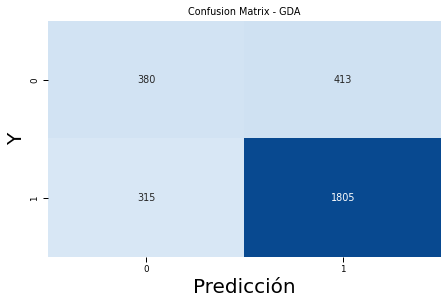

In [ ]:
matrix = confusion_matrix(y_train, yp)

df_matrix = pd.DataFrame(matrix)
# crear mapa de calor dibujar mapa de calor
sns.heatmap(df_matrix, annot=True, cbar=None, fmt="", vmin=0, vmax=2000, cmap="Blues")
plt.title("Confusion Matrix - GDA"), plt.tight_layout()
plt.ylabel("Y"), plt.xlabel("Predicción")
plt.show()

## **2.4. Calcular los parámetros *$θ$*=[*$θ_0$*,*$θ$*'$]^T$**

##$\theta_0 = \frac{1}{2}\mu_o^{T}\sum^{-1}\mu_0-\frac{1}{2}\mu_1^{T}\sum^{-1}\mu_1+\log(\frac{\phi}{1-\phi})$
##$\theta^{'} = \sum^{-1}(\mu_1 - \mu_0)$

In [ ]:
def calcular_parametros_theta(Sigma, mu_0, mu_1, phi):
  """
  Función para el cálculo de los parámetros theta del modelo GDA
  Entrada: Sigma  --> Matrix de (n, n) con los valores de Sigma
  Entrada: mu_0   --> Arreglo de longitud (1, n) con el vector de medias mu_0
  Entrada: mu_1   --> Arreglo de longitud (1, n) con el vector de medias mu_1
  Entrada: phi    --> Escalar que tiene el valor de phi
  Retorna: theta  --> Array con los parámetros theta del modelo GDA
  """

  # Hallar la inversa de Sigma
  Sigma_Inv = np.linalg.inv(Sigma)

  # Calcular theta_0 aplicando las fórmulas expuestas en esta sección
  theta_0 = ((0.5)*mu_0.T.dot(Sigma_Inv).dot(mu_0)) -((0.5)*mu_1.T.dot(Sigma_Inv).dot(mu_1)) + (np.log(phi/(1-phi)))

  # Calcular theta' aplicando las fórmulas expuestas en esta sección
  theta_prima = Sigma_Inv.dot(mu_1 - mu_0)

  # Crear el array que contiene theta_0 y theta'
  theta = np.concatenate((theta_0, theta_prima), axis=0)
  return theta

# Calcular los parámetros theta del modelo GDA
theta_gda = calcular_parametros_theta(Sigma, mu_0, mu_1, phi)

# Mostrar el valor de los parámetros theta del modelo GDA en formato Latex
Math(mostrar_array_latex(theta_gda," \\theta_{GDA} ="))

<IPython.core.display.Math object>

# **3. Regresión Logística**

## **3.1. Modelar con regresión logística utilizando el mismo dataset y obtener los parámetros $θ$ = [*$θ_0$*,*$θ'$*$]^T$.**## 

In [ ]:
def sigmoid(X):
  """ 
  Función para hallar la sigmoid
  Entrada: X   --> Arreglo de entrada con dimensiones: (m,n) 
  Retorna: sig --> Retorna el arreglo resultante después de aplicar la función sigmoid a cada posición de X 
  """
  sig = 1 / (1 + np.exp(-X))
  return sig

def gradiente_descendente_rl(X, y, theta, alpha, iteraciones):
  """ 
  Función para hallar los theta's a partir del gradiente descendente para la regresión logística
  Entrada: X             --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: y             --> Arreglo con las y que tiene valores 0 o 1. Dimensiones: (m,1) 
  Entrada: theta         --> Arreglo de parámetros del modelo. Dimensiones: (n,1) 
  Entrada: alpha         --> Tasa de aprendizaje. Es un escalar que puede permitir decimales.
  Entrada: iteraciones   --> Número de iteraciones. Es un escalar entero
  Retorna: costo_history --> El resultado para cada iteración de la función de costo
  Retorna: theta         --> Los theta's calculado después de aplicar el gradiente descendente
  """

  m = len(y)
  cost_history = []

  for i in range(iteraciones):
    theta = theta - (alpha/m)*(X.T @ (sigmoid(X @ theta)-y))

  return theta 

def predecir_rl(X, theta):
  """ 
  Función para predecir (h) 
  Entrada: X     --> Arreglo de entrada con dimensiones: (m,n) 
  Entrada: theta --> Arreglo de parámetros del modelo. Dimensiones: (n,1) 
  Retorna:       --> Valor de la predicción
  """
  return sigmoid(X @ theta)    

In [ ]:
# Inicializar el número máximo de iteraciones para el gradiente descendiente de la RL
iterac = 200000

# Inicializar la tasa de aprendizaje del modelo RL
alpha = 0.2

# Número de ejemplares en el dataset
m_rl = len(y_train)                             

# Actualizar las entradas
X_rl = np.hstack((np.ones((m_rl,1)),X_train))    

# Armar el array de Etiquetas   
y_rl = np.array(df_y_train['tipo_cliente_']).reshape(-1,1)     

# Número de atributos. Obtenerlo a partir de X_rl para que sea genérico.
n_rl = np.size(X_rl,1)                     

# Inicializar el array con los parámetros theta con ceros 
theta = np.zeros((n_rl,1))                

# hallar los parámetros theta del modelo usando el gradiente descendiente
theta_rl = gradiente_descendente_rl(X_rl, y_rl, theta, alpha, iterac)

# Mostrar los resultados de theta en formato Latex
Math(mostrar_array_latex(theta_rl," \\theta_{Regresión Log} =".replace(" "," \\ ")))

<IPython.core.display.Math object>

## **3.2.	Calcular el accuracy (exactitud) del modelo respecto al dataset de entrenamiento**

In [ ]:
# Calcular el número de aciertos del modelo
h_pred_rl = predecir_rl(X_rl,theta_rl)
h_pred2_rl = np.array([1 if h_pred_rl[i] >= 0.5 else 0 for i in range(m_rl)])
h_pred2_rl = h_pred2_rl.reshape(-1,1)
numero_aciertos_rl = int(sum(h_pred2_rl == y_rl))

# Dividir el número de aciertos por el número de ejemplares
puntaje_rl = float(sum(h_pred2_rl == y_rl)) / float(len(y_rl))

# Mostrar la precisión en formato Latex
display(Latex(("$Número de ejemplares evaluados: "+str(len(y_rl))).replace(" "," \\ ")+"$"))
display(Latex(("$Número de aciertos: "+str(numero_aciertos_rl)).replace(" "," \\ ")+"$"))
display(Latex(("$La precisión para el modelo de Regresión Logística respecto al dataset de entrenamiento es: "+str(puntaje_rl*100)).replace(" "," \\ ")+"\%$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

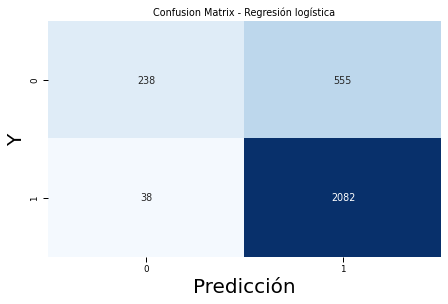

In [ ]:
matrix = confusion_matrix(y_rl, h_pred2_rl)

df_matrix = pd.DataFrame(matrix)
sns.heatmap(df_matrix, annot=True, cbar=None, fmt="", vmin=0, vmax=2000, cmap="Blues")
plt.title("Confusion Matrix - Regresión logística"), plt.tight_layout()
plt.ylabel("Y"), plt.xlabel("Predicción")
plt.show()

# **4. Perceptrón**

## **4.1. Modelar con perceptrón utilizando el mismo dataset y obtener los parámetros  $θ$ = [*$θ_0$*,*$θ'$*$]^T$**

In [ ]:
def perceptron(X):
    """
    Función que calcula el perceptron
    Entrada: X     --> Un número real.
    Retorna: 1 ó 0 --> Retorna el valor booleano correspondiente 
    """
    return 1 if (X >= 0) else 0

def gradiente_descendente_perc(X, y, theta, alpha, max_iter_permitidas=5000):
  """
  Función para calcular el arreglo theta a través de gradiente descendente estocástico
  Entrada: X                    --> Arreglo de atributos de entrada. Dimensiones = (m,n)
  Entrada: y                    --> Arreglo de etiquetas (0 o 1). Dimensiones = (m,1)
  Entrada: theta                --> Arreglo de parámetros. Dimensiones = (n,1)
  Entrada: alpha                --> Tasa de aprendizaje. Es un escalar de punto flotante
  Entrada: debug                --> Indica si se pueden colocar mensajes de ayuda para revisar los cálculos
  Entrada: max_iter_permitidas  --> Máximo número de iteraciones permitidas para evitar que el ciclo quede en el infinito  
  Retorna: maximo_coincidencias --> El número máximo de coincidencias entre h y Y
  Retorna: theta_optimo         --> Los parámetros del modelo 
  """
  m = len(y)
  sw = 0
  iteracion = 1
  maximo_coincidencias = 0
  theta_optimo = theta
  iteracion_del_maximo = 1

  while sw == 0:
    
    for i in range(m):
      
      X_i = X[i,:].reshape(1,X.shape[1])
      y_i = np.squeeze(y[i])
      h_i = perceptron(X_i @ theta)
      theta = theta + alpha * (X_i.T *(y_i - h_i))

    h = np.zeros((X.shape[0],1), dtype=int)

    for i in range(m):  
        X_i = X[i,:].reshape(1,X.shape[1])
        h_i = perceptron(X_i @ theta)
        h[i] = h_i

    if maximo_coincidencias < sum(h==y):
      theta_optimo = theta
      maximo_coincidencias = sum(h==y)
      iteracion_del_maximo = iteracion

    if int(sum(h==y)) == m:
      sw = 1
    else:
      if iteracion >= max_iter_permitidas:
        sw = 1 
    
    iteracion = iteracion + 1
      
  return iteracion_del_maximo, maximo_coincidencias, theta_optimo


def gradiente_descendente_perc_sin_iteraciones(X, y, theta, alpha):
  """
  Función para calcular el arreglo theta a través de gradiente descendente estocástico (Solo recorre una vez los ejemplares)
  Entrada: X                   --> Arreglo de atributos de entrada. Dimensiones = (m,n)
  Entrada: y                   --> Arreglo de etiquetas (0 o 1). Dimensiones = (m,1)
  Entrada: theta               --> Arreglo de parámetros. Dimensiones = (n,1)
  Entrada: alpha               --> Tasa de aprendizaje. Es un escalar de punto flotante
  Entrada: debug               --> Indica si se pueden colocar mensajes de ayuda para revisar los cálculos 
  Retorna: theta               --> Los parámetros del modelo 
  """
  m = len(y)
  
  for i in range(m):
      
      X_i = X[i,:].reshape(1,X.shape[1])
      y_i = y[i].reshape(1,1)

      h = perceptron(np.dot(X_i,theta))
      theta = theta + alpha*(X_i.T.dot((y_i - h)))

  h = np.zeros((X.shape[0],1), dtype=int)

  for i in range(m):  
      X_i = X[i,:].reshape(1,X.shape[1])
      h_i = perceptron(X_i @ theta)
      h[i] = h_i

  coincidencias = sum(h==y)

  return coincidencias, theta, h

def predecir_perc(X, theta):
  """
  Función para calcular el arreglo con todas las predicciones del modelo
  Entrada: X     --> Arreglo de atributos de entrada. Dimensiones = (m,n)
  Entrada: theta --> Arreglo de parámetros. Dimensiones = (n,1)
  Retorna: h     --> Arreglo con la predicción de las filas
  """
  h = np.zeros((X.shape[0],1), dtype=int)

  m = X.shape[0]
  for i in range(m):
      X_i = X[i,:].reshape(1,X.shape[1])        
      h_i = perceptron(X_i @ theta)
      h[i] = int(h_i)
      
  return h    

In [ ]:
# Inicializar el número máximo de iteraciones para el gradiente descendiente de la RL
iterac = 70000

# Inicializar la tasa de aprendizaje del modelo RL
alpha = 0.95

# Número de ejemplares en el dataset
m_perc = len(y_train)               

# Array de características               

# Actualizar las entradas
X_perc = np.hstack((np.ones((m_perc,1)),X_train))   

# Array de etiquetas
y_perc = np.array(df_y_train['tipo_cliente_']).reshape(-1,1)     

# Número de atributos. Obtenerlo a partir de X para que sea genérico.
n_perc = np.size(X_perc,1)        

# Inicializar el array de theta con ceros
theta = np.zeros((n_perc,1))                 

# ejecutar el gradiente descendiente con iteraciones
#iteraciones, numero_aciertos_perc, theta_perc = gradiente_descendente_perc(X_perc, y_perc, theta, alpha, iterac)
numero_aciertos_perc, theta_perc, h_perc = gradiente_descendente_perc_sin_iteraciones(X_perc, y_perc, theta, alpha)

# Mostrar los resultados de theta y el número de iteracciones donde encontró el mejor rendimiento del modelo en formato Latex
#display(Latex(("$Iteraciones: "+str(iteraciones).replace(" "," \\ ")+"$")))
display(Latex("$ \\ $"))
Math(mostrar_array_latex(theta_perc," \\theta_{Perceptrón} ="))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

## **4.2.	Calcular el accuracy (exactitud) del modelo respecto al dataset de entrenamiento**

In [ ]:
# Dividir el número de aciertos por el número de ejemplares
puntaje_perc = float(numero_aciertos_perc) / float(len(y_perc))

# Mostrar la precisión en formato Latex
display(Latex(("$Número de ejemplares evaluados: "+str(len(y_perc))).replace(" "," \\ ")+"$"))
display(Latex(("$Número de aciertos: "+str(int(numero_aciertos_perc))).replace(" "," \\ ")+"$"))
display(Latex(("$La precisión para el modelo de Perceptrón respecto al dataset de entrenamiento es: "+str(puntaje_perc*100)).replace(" "," \\ ")+"\%$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

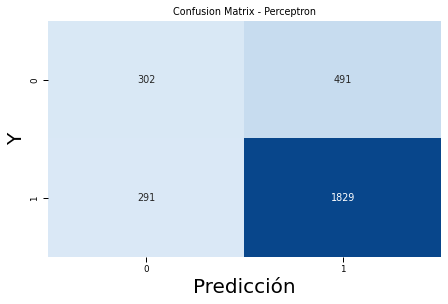

In [ ]:
#@title
matrix = confusion_matrix(y_perc, h_perc)

df_matrix = pd.DataFrame(matrix)
# crear mapa de calor dibujar mapa de calor
sns.heatmap(df_matrix, annot=True, cbar=None, fmt="", vmin=0, vmax=2000, cmap="Blues")
plt.title("Confusion Matrix - Perceptron"), plt.tight_layout()
plt.ylabel("Y"), plt.xlabel("Predicción")
plt.show()

In [ ]:


df_resultados = pd.Dataframe()
modelos = ['Juan', 'Laura', 'Pepe']
accuracy = [42, 40, 37]
clientes_buenos = 
cliente
columns="Modelo, Accuracy,Clientes buenos,Aciertos - Buenos, Clientes malos, Aciertos - Malos", data={})

AttributeError: ignored